In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import yfinance as yf
from IPython.utils.io import capture_output

from sklearn.preprocessing import RobustScaler

In [106]:
def delete_columns_from_csv(file_path, columns_to_delete, output_file_path=None):
   
    df = pd.read_csv(file_path)
    
    
    df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
    
    
    if output_file_path:
        df.to_csv(output_file_path, index=False)
    
    return df


In [107]:
### Profile 
file_path_Profile = "company_profiles.csv"
columns_to_delete_Profile = ['description', 'mic_code','website','type','CEO','address','city','phone']
output_file_path_profile = 'FinalProjetProfile.csv'
### Income
file_path_Income = "income_statements.csv"
columns_to_delete_Income = ['pretax_income', 'income_tax','ebit']
output_file_path_Income = 'FinalProjetIncome.csv'

### cash flow 
file_path_Cash_Flow = "cash_flow_data.csv"
columns_to_delete_Cash_Flow = [ 'operating_activities.net_income','operating_activities.depreciation','operating_activities.deferred_taxes','operating_activities.stock_based_compensation','operating_activities.other_non_cash_items','operating_activities.accounts_receivable','operating_activities.accounts_payable','operating_activities.other_assets_liabilities','investing_activities.capital_expenditures','investing_activities.net_intangibles','investing_activities.net_acquisitions','investing_activities.purchase_of_investments','investing_activities.sale_of_investments','investing_activities.other_investing_activity','financing_activities.long_term_debt_issuance','financing_activities.long_term_debt_payments','financing_activities.short_term_debt_issuance','financing_activities.common_stock_issuance','financing_activities.common_stock_repurchase','financing_activities.common_dividends','financing_activities.other_financing_charges','exchange_timezone','period']
output_file_path_Cash_Flow = 'FinalProjet_CashFlow.csv'

### modified csv all 

modified_df_Profile = delete_columns_from_csv(file_path_Profile, columns_to_delete_Profile, output_file_path_profile)
modified_df_Income = delete_columns_from_csv(file_path_Income, columns_to_delete_Income, output_file_path_Income)
modified_df_CashFlow = delete_columns_from_csv(file_path_Cash_Flow, columns_to_delete_Cash_Flow, output_file_path_Cash_Flow)


In [108]:
modified_df_Profile.columns

Index(['symbol', 'name', 'exchange', 'sector', 'industry', 'employees', 'zip',
       'state', 'country'],
      dtype='object')

balance_sheet_data - modify to be a table and not array with array as string in csv

In [109]:
from pandas import json_normalize
import ast

df = pd.read_csv("C:\\Users\\annak\\Desktop\\ML-Project\\balance_sheet_data.csv")


def convert_if_string(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x

def recursive_flatten_columns(df, prefix=''):
    for column in df.columns:

        df[column] = df[column].apply(convert_if_string)
        
        if isinstance(df[column].iloc[0], dict):
            # Flatten dictionaries directly into the DataFrame
            temp_df = json_normalize(df[column])
            temp_df.columns = [f"{prefix}{column}.{subcol}" for subcol in temp_df.columns]
            df = df.drop(column, axis=1).join(temp_df)
        elif isinstance(df[column].iloc[0], list):

            pass  
    return df

df_flattened = recursive_flatten_columns(df)


In [110]:
columns_to_keep = [
    "fiscal_date", 
    "symbol", 
    "assets.total_assets", 
    "assets.current_assets.total_current_assets", 
    "assets.non_current_assets.total_non_current_assets", 
    "liabilities.total_liabilities", 
    "liabilities.current_liabilities.short_term_debt", 
    "liabilities.current_liabilities.total_current_liabilities", 
    "liabilities.non_current_liabilities.long_term_debt", 
    "liabilities.non_current_liabilities.total_non_current_liabilities", 
    "shareholders_equity.common_stock", 
    "shareholders_equity.retained_earnings", 
    "shareholders_equity.other_shareholders_equity", 
    "shareholders_equity.total_shareholders_equity", 
    "shareholders_equity.additional_paid_in_capital", 
    "shareholders_equity.treasury_stock", 
    "shareholders_equity.minority_interest"
]

df_filtered = df_flattened[columns_to_keep]

print(df_filtered.head())


  fiscal_date symbol  assets.total_assets  \
0  2023-06-30   MSFT         4.119760e+11   
1  2022-06-30   MSFT         3.648400e+11   
2  2021-06-30   MSFT         3.337790e+11   
3  2020-06-30   MSFT         3.013110e+11   
4  2019-06-30   MSFT         2.865560e+11   

   assets.current_assets.total_current_assets  \
0                                1.842570e+11   
1                                1.696840e+11   
2                                1.844060e+11   
3                                1.819150e+11   
4                                1.755520e+11   

   assets.non_current_assets.total_non_current_assets  \
0                                       2.277190e+11    
1                                       1.951560e+11    
2                                       1.493730e+11    
3                                       1.193960e+11    
4                                       1.110040e+11    

   liabilities.total_liabilities  \
0                   2.057530e+11   
1                  

In [111]:
rename_columns = {
    "fiscal_date": "fiscal_date",
    "symbol": "symbol",
    "assets.total_assets": "total_assets",
    "assets.current_assets.total_current_assets": "total_current_assets",
    "assets.non_current_assets.total_non_current_assets": "total_non_current_assets",
    "liabilities.total_liabilities": "total_liabilities",
    "liabilities.current_liabilities.short_term_debt": "short_term_debt",
    "liabilities.current_liabilities.total_current_liabilities": "total_current_liabilities",
    "liabilities.non_current_liabilities.long_term_debt": "long_term_debt",
    "liabilities.non_current_liabilities.total_non_current_liabilities": "total_non_current_liabilities"
}


df_filtered = df_filtered.rename(columns=rename_columns)


print(df_filtered.head())

  fiscal_date symbol  total_assets  total_current_assets  \
0  2023-06-30   MSFT  4.119760e+11          1.842570e+11   
1  2022-06-30   MSFT  3.648400e+11          1.696840e+11   
2  2021-06-30   MSFT  3.337790e+11          1.844060e+11   
3  2020-06-30   MSFT  3.013110e+11          1.819150e+11   
4  2019-06-30   MSFT  2.865560e+11          1.755520e+11   

   total_non_current_assets  total_liabilities  short_term_debt  \
0              2.277190e+11       2.057530e+11     5.247000e+09   
1              1.951560e+11       1.982980e+11     2.749000e+09   
2              1.493730e+11       1.917910e+11     8.072000e+09   
3              1.193960e+11       1.830070e+11     3.749000e+09   
4              1.110040e+11       1.669680e+11     5.516000e+09   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   

In [112]:
df_filtered.to_csv('flat_balance_sheet_data.csv', index=False)


In [113]:
modified_df_CashFlow.head() 	

fiscal_date  end_cash_position  income_tax_paid  interest_paid  \
0  2020-06-30        13576000000              NaN            NaN   
1  2021-06-30        14224000000              NaN            NaN   
2  2022-06-30        13931000000              NaN            NaN   
3  2023-06-30        34704000000              NaN            NaN   
4  2020-09-30        39789000000     9.501000e+09   3.002000e+09   

   free_cash_flow  operating_activities.operating_cash_flow  \
0    4.523400e+10                              6.089400e+10   
1    5.611800e+10                              7.798900e+10   
2    6.514900e+10                              8.944400e+10   
3    5.947500e+10                              8.738600e+10   
4    7.336500e+10                              8.067400e+10   

   investing_activities.investing_cash_flow  \
0                             -1.222300e+10   
1                             -2.757700e+10   
2                             -3.031100e+10   
3                             -2.268000e+10   
4                             -4.289000e+09   

   financing_activities.financing_cash_flow symbol            name currency  \
0                             -4.603100e+10   MSFT  Microsoft Corp      USD   
1                             -4.848600e+10   MSFT  Microsoft Corp      USD   
2                             -5.887600e+10   MSFT  Microsoft Corp      USD   
3                             -4.393500e+10   MSFT  Microsoft Corp      USD   
4                             -8.594000e+10   AAPL       Apple Inc      USD   

  exchange mic_code  
0   NASDAQ     XNGS  
1   NASDAQ     XNGS  
2   NASDAQ     XNGS  
3   NASDAQ     XNGS  
4   NASDAQ     XNGS

In [114]:
modified_df_Income.head()

fiscal_date         sales  cost_of_goods  gross_profit  operating_income  \
0  30/06/2023  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1  30/06/2022  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2  30/06/2021  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3  30/06/2020  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4  30/09/2023  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...        ebitda  \
0              7.446000e+09  ...  1.051550e+11   
1              7.496000e+09  ...  9.990500e+10   
2              7.547000e+09  ...  8.383100e+10   
3              7.610000e+09  ...  6.839500e+10   
4              1.574423e+10  ...  1.291880e+11   

   net_income_continuous_operations  minority_interests  \
0                      7.236100e+10                 NaN   
1                      7.273800e+10                 NaN   
2                      6.127100e+10                 NaN   
3                      4.428100e+10                 NaN   
4                      9.699500e+10                 NaN   

   preferred_stock_dividends  research_and_development  \
0                        NaN              2.719500e+10   
1                        NaN              2.451200e+10   
2                        NaN              2.071600e+10   
3                        NaN              1.926900e+10   
4                        NaN              2.991500e+10   

   selling_general_and_administrative  other_operating_expenses        income  \
0                        3.033400e+10                       NaN  2.994000e+09   
1                        2.772500e+10                       NaN  2.094000e+09   
2                        2.522400e+10                       NaN  2.131000e+09   
3                        2.470900e+10                       NaN  2.680000e+09   
4                        2.493200e+10                       NaN  3.750000e+09   

        expense  symbol  
0  1.968000e+09    MSFT  
1  2.063000e+09    MSFT  
2  2.346000e+09    MSFT  
3  2.591000e+09    MSFT  
4  3.933000e+09    AAPL  

[5 rows x 21 columns]

now we merge all data in symbol+year, we will create year colunm for each table first

In [115]:
import pandas as pd

def add_year_column(dataframe, date_column='Date', output_column='year', date_format='%d/%m/%Y'):
    """
    Adds a 'year' column to a DataFrame based on a specified 'Date' column.
    
    Parameters:
    - dataframe: pd.DataFrame, the DataFrame to modify.
    - date_column: str, the name of the column containing date information.
    - output_column: str, the name of the new column to be added, containing the extracted year.
    - date_format: str, the format of the dates in the date_column.
    
    Returns:
    - A DataFrame with the new 'year' column added.
    """
    # Ensure the date_column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    
    # Extract the year and create the new column
    dataframe[output_column] = dataframe[date_column].dt.year
    
    return dataframe







In [116]:
modified_df_Income = add_year_column(modified_df_Income, 'fiscal_date', 'year')
modified_df_CashFlow = add_year_column(modified_df_CashFlow,'fiscal_date', 'year','%Y-%m-%d')
modified_balance_sheet = add_year_column(df_filtered, 'fiscal_date', 'year', '%Y-%m-%d')

print(modified_df_Income[['fiscal_date', 'year']].head())
print(modified_df_CashFlow[['fiscal_date', 'year']].head())
print(modified_balance_sheet[['fiscal_date', 'year']].head())

  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2023-09-30  2023
  fiscal_date  year
0  2020-06-30  2020
1  2021-06-30  2021
2  2022-06-30  2022
3  2023-06-30  2023
4  2020-09-30  2020
  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2019-06-30  2019


Merge

In [117]:
print(len(modified_df_Income))
print(len(modified_df_CashFlow))
print(len(modified_balance_sheet))

5478
5439
8087


In [118]:
# Check for duplicates based on 'year' and 'symbol'
print(modified_df_Income.duplicated(subset=['year', 'symbol']).sum())
print(modified_df_CashFlow.duplicated(subset=['year', 'symbol']).sum())
print(modified_balance_sheet.duplicated(subset=['year', 'symbol']).sum())


12
6
99


drop duplicates

In [119]:

modified_df_Income = modified_df_Income.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_df_CashFlow = modified_df_CashFlow.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_balance_sheet = modified_balance_sheet.drop_duplicates(subset=['year', 'symbol'], keep=False)

print( len(modified_df_Income))
print(len(modified_df_CashFlow))
print( len(modified_balance_sheet))


5454
5427
7890


In [120]:
merged_df_2 = pd.merge(modified_df_Income, modified_df_CashFlow, on=['year', 'symbol'], how='inner')


final_merged_df = pd.merge(merged_df_2, modified_balance_sheet, on=['year', 'symbol'], how='inner')

print(len(final_merged_df))
print(final_merged_df.head())

5365
  fiscal_date_x         sales  cost_of_goods  gross_profit  operating_income  \
0    2023-06-30  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1    2022-06-30  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2    2021-06-30  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3    2020-06-30  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4    2023-09-30  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...  total_current_liabilities  long_term_debt  \
0              7.446000e+09  ...            

In [121]:
final_merged_df.to_csv('final_merged_df', index=False)
final_merged_df.columns


Index(['fiscal_date_x', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 'symbol', 'year', 'fiscal_date_y',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow', 'name', 'currency',
       'exchange', 'mic_code', 'fiscal_date', 'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabi

missing values


In [122]:
# we drop all data without net income. after earching the data for the rest, we safely fillna(0).
final_merged_df = final_merged_df.dropna(subset=[ 'net_income'])
final_merged_df = final_merged_df.fillna(0)


print(f"Number of rows after dropping NaNs in 'net_income': {final_merged_df.shape[0]}")

Number of rows after dropping NaNs in 'net_income': 5363


Next, we want only stocks with 3 years of data and more

In [123]:
ticker_counts = final_merged_df['symbol'].value_counts()

tickers_with_3_or_more_years = ticker_counts[ticker_counts >= 3]
print(f"Number of companies with data for 3 or more years: {len(tickers_with_3_or_more_years)}")

Number of companies with data for 3 or more years: 1439


In [124]:
tickers_to_keep = tickers_with_3_or_more_years.index.tolist()

In [125]:
final_merged_df = final_merged_df[final_merged_df['symbol'].isin(tickers_to_keep)]


print(f"Number of rows after filtering: {final_merged_df.shape[0]}")

Number of rows after filtering: 5088


In [126]:
distinct_tickers_count = final_merged_df['symbol'].nunique()
distinct_tickers_count

1439

In [127]:
final_merged_df = final_merged_df[[ 'year', 'symbol','fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

In [128]:
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   
2               8.865700e+10    5.970300e+10                   1.031340e+11   
3               7.231000e+10    6.724900e+10                   1.106970e+11   
4               1.453080e+11    9.528100e+10                   1.451290e+11   

   shareholders_equity.common_stock  shareholders_equity.retained_earnings  \
0                      9.371800e+10                           1.188480e+11   
1                      8.693900e+10                           8.428100e+10   
2                      8.311100e+10                           5.705500e+10   
3                      8.055200e+10                           3.456600e+10   
4                      7.381200e+10                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  
0                                 0.0                                    0.0  
1                                 0.0                                    0.0  
2                                 0.0                                    0.0  
3                                 0.0                                    0.0  
4                                 0.0                                    0.0  

[5 rows x 46 columns]

In [129]:
corrdf = final_merged_df[['fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

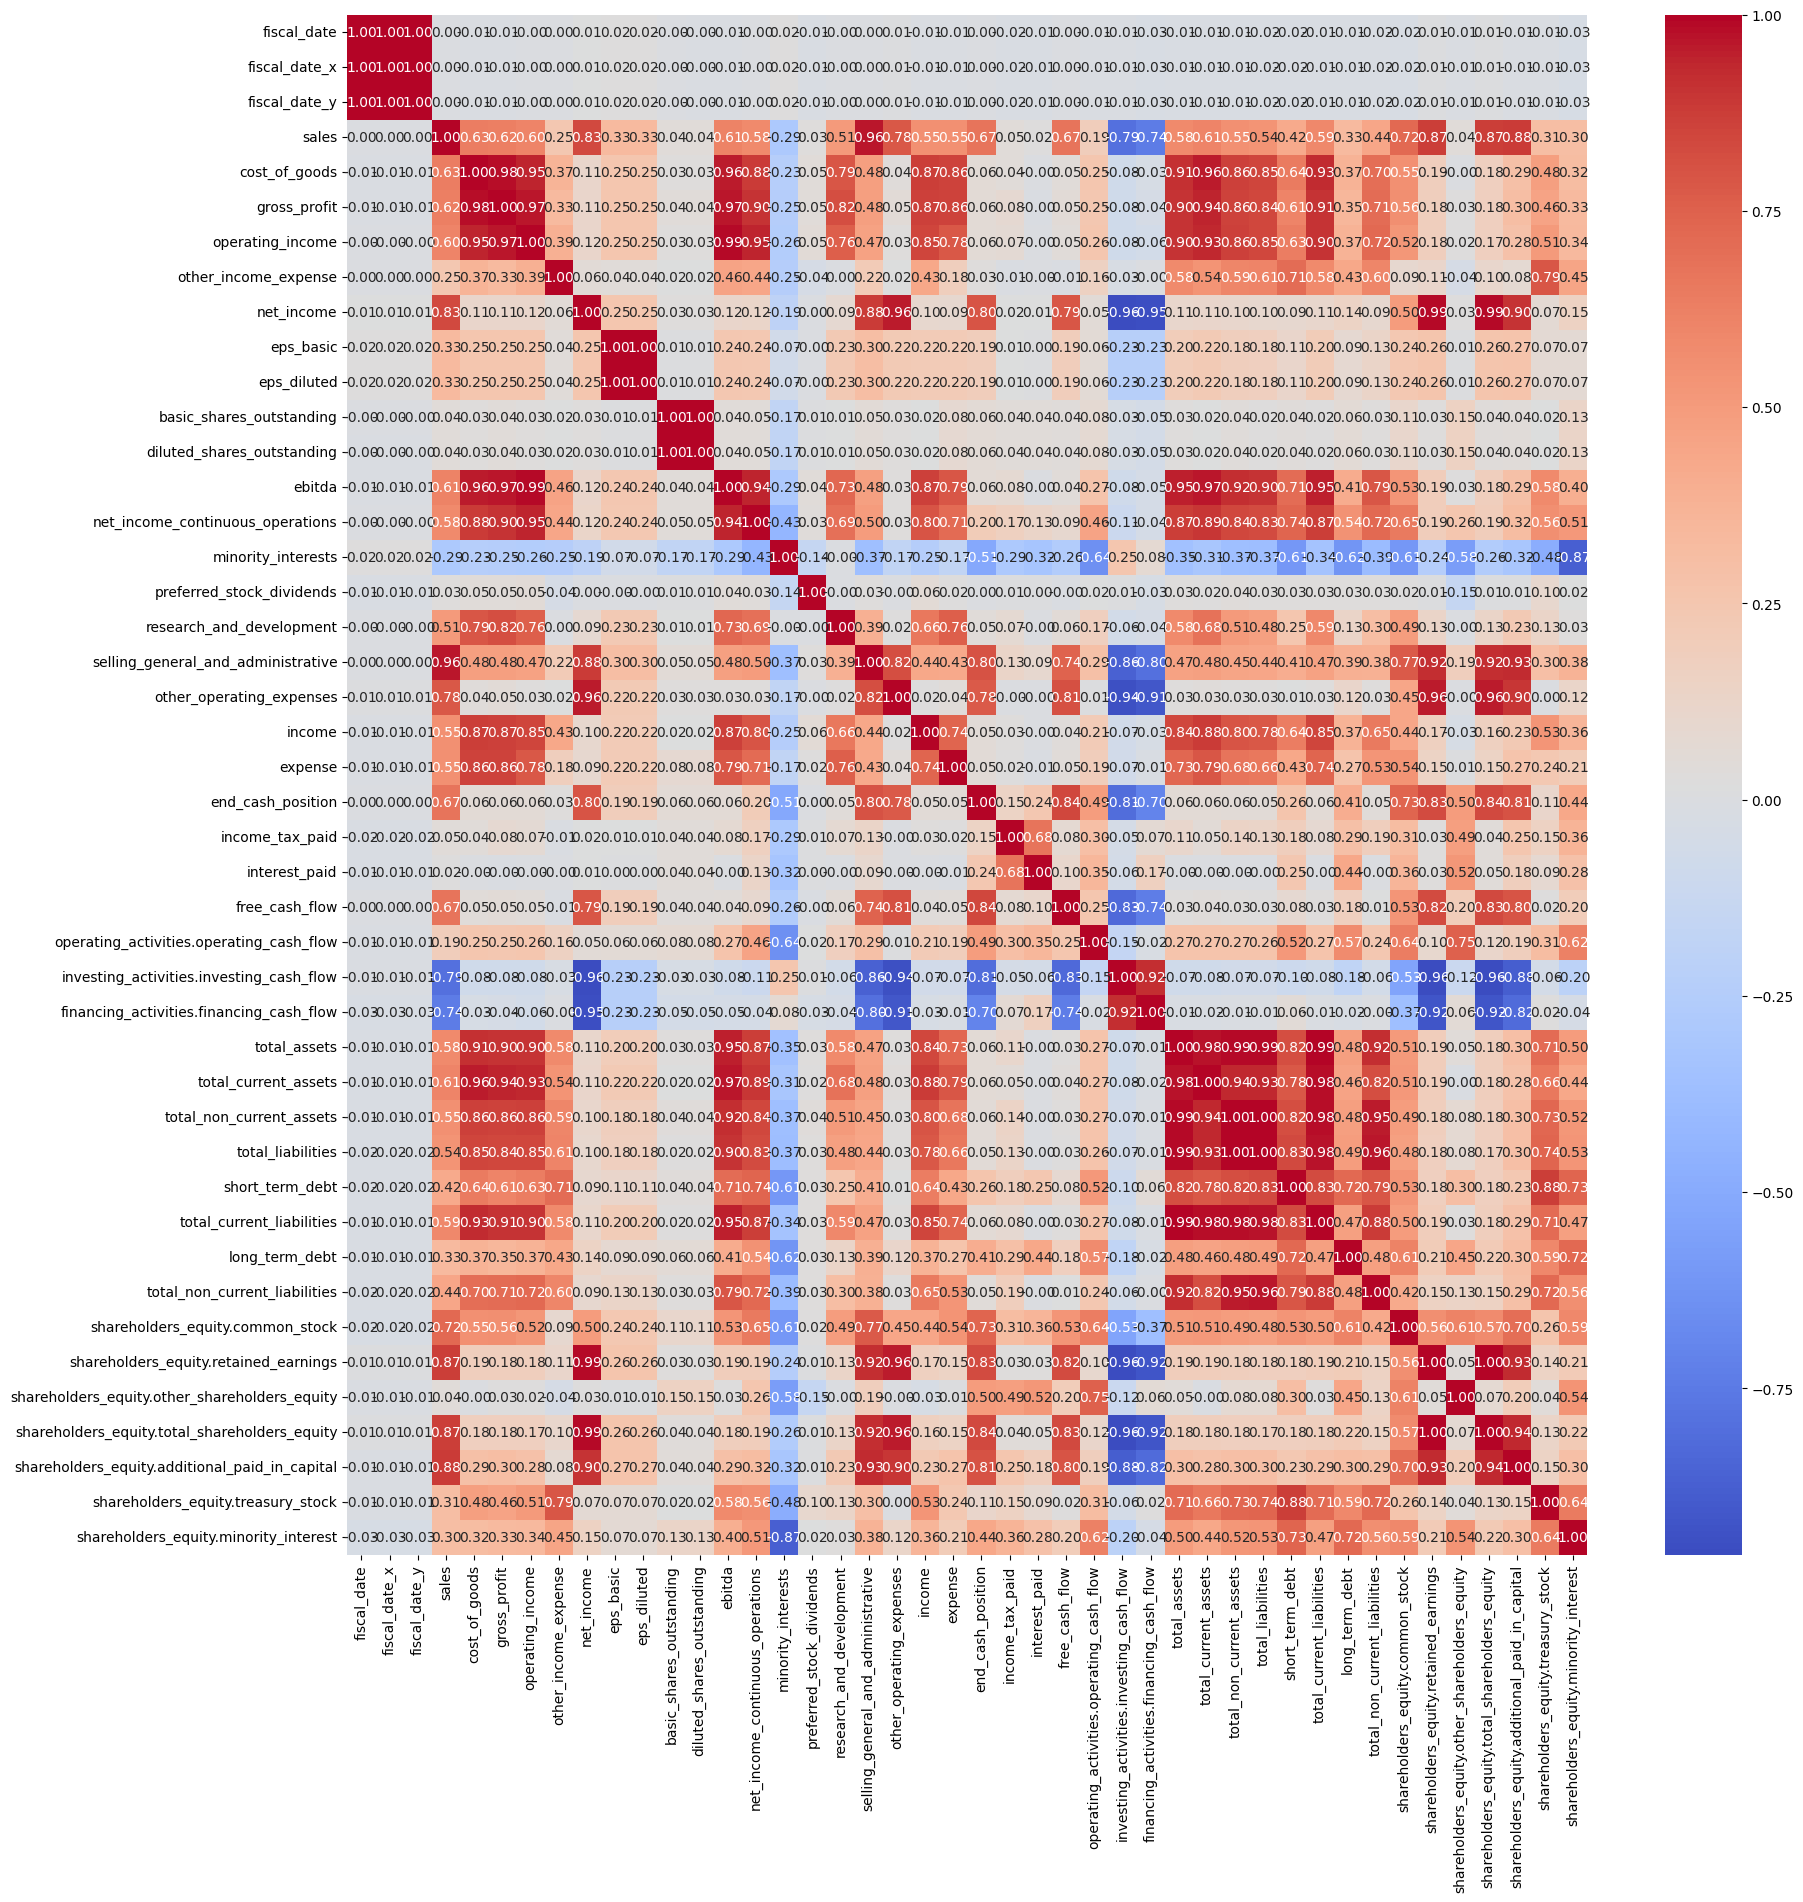

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
corr_matrix = corrdf.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Indicator Functions

In [131]:
def calculate_debt_to_equity_ratio(df):

    numerator = df['long_term_debt'] + df['short_term_debt']

    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])


    df['Debt to Equity Ratio'] = np.divide(numerator, denominator)


    df['Debt to Equity Ratio'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Debt to Equity Ratio'].fillna(0, inplace=True)

    return df


def calculate_Profit_Margin(df):

    numerator = df['net_income'] 


    denominator = np.where((df['sales']) == 0,
                           np.nan,
                           df['sales'] )


    df['Profit Margin'] = np.divide(numerator, denominator)


    df['Profit Margin'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Profit Margin'].fillna(0, inplace=True)

    return df


def calculate_Return_On_Equity(df):

    numerator = df['net_income'] 


    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])



    df['Return On Equity'] = np.divide(numerator, denominator)


    df['Return On Equity'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Equity'].fillna(0, inplace=True)

    return df




def calculate_Return_On_Assets(df):

    numerator = df['net_income'] 


    denominator = np.where((df['total_assets']) == 0,
                           np.nan,
                           df['total_assets'] )


    df['Return On Assets'] = np.divide(numerator, denominator)


    df['Return On Assets'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Assets'].fillna(0, inplace=True)

    return df

In [132]:
final_merged_df=calculate_debt_to_equity_ratio(final_merged_df)
final_merged_df=calculate_Profit_Margin(final_merged_df)
final_merged_df=calculate_Return_On_Equity(final_merged_df)
final_merged_df=calculate_Return_On_Assets(final_merged_df)



final_merged_df.head()


year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   shareholders_equity.retained_earnings  \
0                           1.188480e+11   
1                           8.428100e+10   
2                           5.705500e+10   
3                           3.456600e+10   
4                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   Debt to Equity Ratio  Profit Margin  Return On Equity  Return On Assets  
0              0.290777       0.341462          0.350887          0.175644  
1              0.367895       0.366863          0.436755          0.199370  
2              0.477329       0.364517          0.431522          0.183568  
3              0.600132       0.309625          0.374298          0.146961  
4              1.787533       0.253062          1.560760          0.275098  

[5 rows x 50 columns]

### market capitalization indicator: (stock price * shares outstanding). we will take the yearly close from yfinance API, for the last 4 years for each symbol we have.
also we want the difference in the years

In [133]:
import yfinance as yf

def get_marketcap_data_csv():
    symbols_list = final_merged_df['symbol'].unique().tolist()

    eoy_prices_df = pd.DataFrame()

    symbols_no_data = []

    for symbol in symbols_list:
        try:
            data = yf.download(symbol, start="2019-12-31", end="2023-12-31")
            eoy_data = data['Close'].resample('Y').last()
            eoy_data = eoy_data.reset_index()
            eoy_data['Symbol'] = symbol
            eoy_prices_df = pd.concat([eoy_prices_df, eoy_data[['Date', 'Symbol', 'Close']]])
        except :
            symbols_no_data.append(symbol)

    eoy_prices_df.columns = ['year', 'symbol', 'close']

    print(f"Symbols with no data: {symbols_no_data}")
    print(f"Number of symbols with no data: {len(symbols_no_data)}")

    eoy_prices_df['year'] = eoy_prices_df['year'].dt.year

    eoy_prices_df.to_csv('eoy_prices.csv', index=False)

def make_marketcap_change_column(final_merged_df):
    
    eoy_prices_df = pd.read_csv('eoy_prices.csv')
    final_merged_df = pd.merge(final_merged_df, eoy_prices_df, on=['year', 'symbol'], how='outer') ## we do outer and dropdna to include 2019
    final_merged_df['market cap'] = final_merged_df['diluted_shares_outstanding'] * final_merged_df['close']

    final_merged_df.sort_values(by=['symbol', 'year'], inplace=True)

    # Group by 'symbol' and then use the shift() function to get the previous year's market cap
    final_merged_df['last_year_market_cap'] = final_merged_df.groupby('symbol')['market cap'].shift(1)


    # Calculate the close change percentage for the previous year as a fallback
    close_change_pct = ((final_merged_df['close'] - final_merged_df.groupby('symbol')['close'].shift(1)) / final_merged_df.groupby('symbol')['close'].shift(1))

    # Use np.where to conditionally fill in market cap change
    # Use np.where to conditionally fill in market cap change
    final_merged_df['market cap change'] = np.where(final_merged_df['last_year_market_cap'].isna(),
                                                np.where(close_change_pct < 300, close_change_pct, 0),
                                                np.where(final_merged_df['last_year_market_cap'] > 0,
                                                         (final_merged_df['market cap'] - final_merged_df['last_year_market_cap']) / final_merged_df['last_year_market_cap'],
                                                         0))

        
    final_merged_df.dropna(subset='net_income',inplace=True)
    final_merged_df.dropna(subset='close',inplace=True) ## this way we remove data we cant make the new indicator for
    return final_merged_df

    


In [134]:
### pacient with this function, it will run for around 5 minutes.
#with capture_output() as captured:
#    get_marketcap_data_csv()


In [135]:
final_merged_df = make_marketcap_change_column(final_merged_df)
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
555   2020   AAON  2020-12-31    2020-12-31    2020-12-31  5.145510e+08   
554   2021   AAON  2021-12-31    2021-12-31    2021-12-31  5.345170e+08   
553   2022   AAON  2022-12-31    2022-12-31    2022-12-31  8.887880e+08   
552   2023   AAON  2023-12-31    2023-12-31    2023-12-31  1.168518e+09   
3866  2020    AAP  2020-12-31    2020-12-31    2020-12-31  1.010632e+10   

      cost_of_goods  gross_profit  operating_income  other_income_expense  \
555    3.587020e+08  1.558490e+08        95358000.0             6529000.0   
554    3.966870e+08  1.378300e+08        69232000.0               82000.0   
553    6.512160e+08  2.375720e+08       126749000.0              411000.0   
552    7.694980e+08  3.990200e+08       227481000.0              516000.0   
3866   5.624707e+09  4.481614e+09       749907000.0           -52006000.0   

      ...  shareholders_equity.treasury_stock  \
555   ...                        0.000000e+00   
554   ...                        0.000000e+00   
553   ...                        0.000000e+00   
552   ...                        0.000000e+00   
3866  ...                        1.394080e+09   

      shareholders_equity.minority_interest  Debt to Equity Ratio  \
555                                     0.0              0.000576   
554                                     0.0              0.089195   
553                                     0.0              0.139556   
552                                     0.0              0.068755   
3866                                    0.0              0.856152   

      Profit Margin  Return On Equity  Return On Assets       close  \
555        0.153549          0.225183          0.175963   44.419998   
554        0.109927          0.126044          0.090372   52.953335   
553        0.112936          0.179015          0.123327   50.213333   
552        0.152007          0.241590          0.188672   73.870003   
3866       0.048783          0.138508          0.041642  157.509995   

        market cap  last_year_market_cap  market cap change  
555   3.475999e+09                   NaN           0.348512  
554   4.162466e+09          3.475999e+09           0.197488  
553   3.996102e+09          4.162466e+09          -0.039968  
552   0.000000e+00          3.996102e+09          -1.000000  
3866  1.082850e+10                   NaN          -0.016546  

[5 rows x 54 columns]

In [136]:
left_columns = [ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

corrdf2 = final_merged_df[[ 'year','sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']]




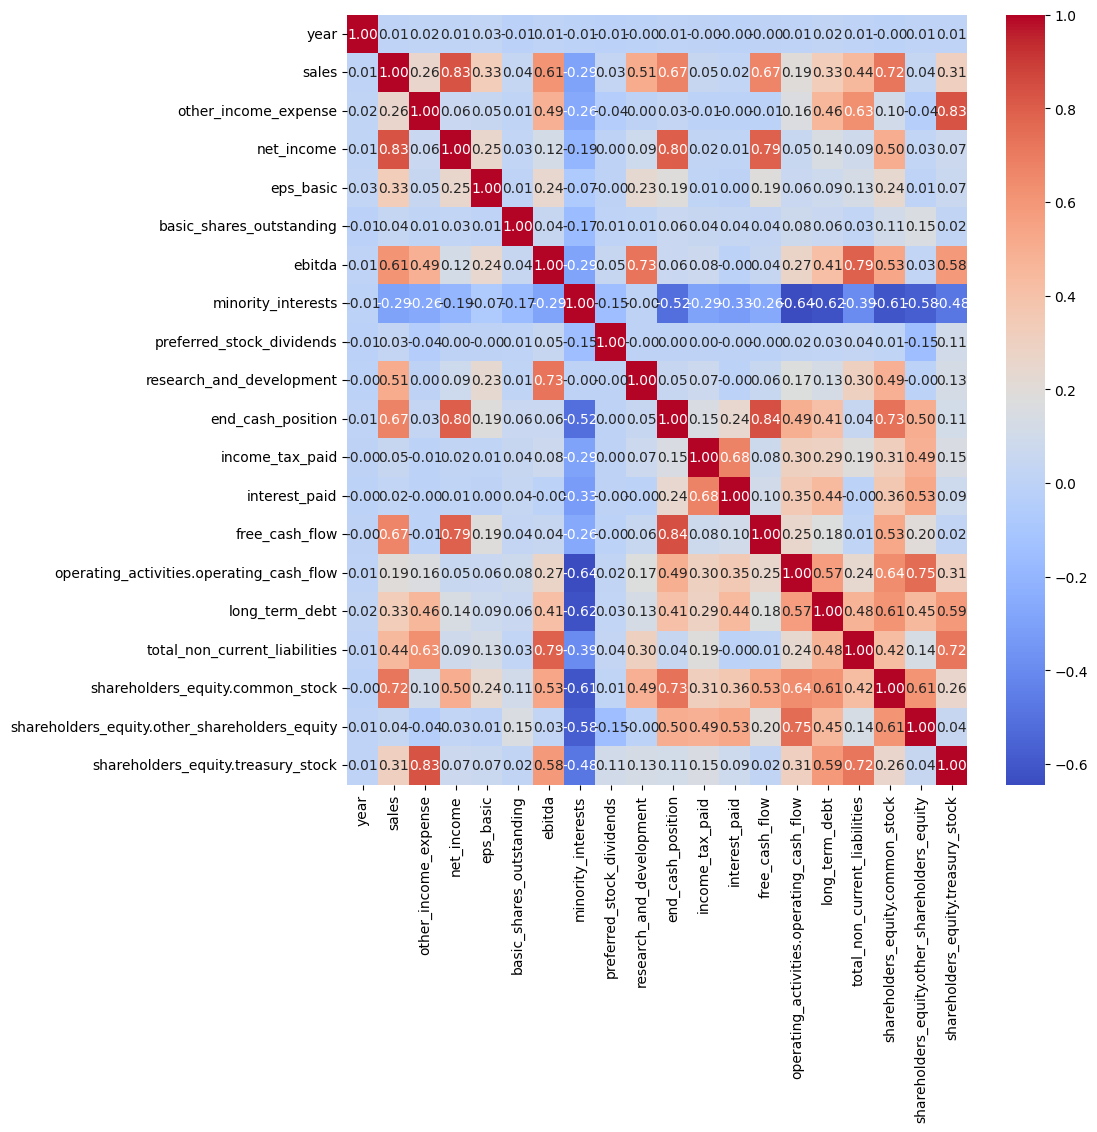

In [137]:


# Assuming `df` is your DataFrame
corr_matrix = corrdf2.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [138]:
final_merged_df = final_merged_df[[ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']]
final_merged_df = pd.merge(final_merged_df, modified_df_Profile, on='symbol', how='inner')

final_merged_df.head()
final_merged_df.columns.value_counts()

year                                             1
symbol                                           1
state                                            1
zip                                              1
employees                                        1
industry                                         1
sector                                           1
exchange                                         1
name                                             1
Return On Assets                                 1
Return On Equity                                 1
Profit Margin                                    1
Debt to Equity Ratio                             1
shareholders_equity.treasury_stock               1
shareholders_equity.other_shareholders_equity    1
shareholders_equity.common_stock                 1
total_non_current_liabilities                    1
long_term_debt                                   1
operating_activities.operating_cash_flow         1
free_cash_flow                 

### Making Groups in Industry


In [139]:
# Mapping of specific industries to broader categories, including "Others"
industry_to_category = {
    # Technology
    'Software—Infrastructure': 'Technology',
    'Consumer Electronics': 'Technology',
    'Semiconductors': 'Technology',
    'Internet Retail': 'Technology',
    'Internet Content & Information': 'Technology',
    'Software—Application': 'Technology',
    'Software - Infrastructure': 'Technology',
    'Information Technology Services': 'Technology',
    'Software - Application': 'Technology',
    'Communication Equipment': 'Technology',
    'Electronic Components': 'Technology',
    'Computer Hardware': 'Technology',
    'Electronic Gaming & Multimedia': 'Technology',
    'Scientific & Technical Instruments' :'Technology',
    'Semiconductor Equipment & Materials': 'Technology',
    'Electrical Equipment & Parts': 'Technology',
    
    # Healthcare & Pharmaceuticals
    'Insurance—Diversified': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—General': 'Healthcare & Pharmaceuticals',
    'Biotechnology': 'Healthcare & Pharmaceuticals',
    'Diagnostics & Research': 'Healthcare & Pharmaceuticals',
    'Medical Devices': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—Specialty & Generic': 'Healthcare & Pharmaceuticals',
    'Medical Instruments & Supplies': 'Healthcare & Pharmaceuticals',
    'Medical Care Facilities': 'Healthcare & Pharmaceuticals',
    'Medical Distribution': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - General': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - Specialty & Generic': 'Healthcare & Pharmaceuticals',
    'Health Information Services':'Healthcare & Pharmaceuticals',
    'Healthcare Plans':'Healthcare & Pharmaceuticals',
    
    # Financial Services
    'Credit Services': 'Financial Services',
    'Banks—Diversified': 'Financial Services',
    'Banks - Diversified': 'Financial Services',
    'Asset Management': 'Financial Services',
    'Footwear & Accessories': 'Financial Services',
    'Capital Markets': 'Financial Services',
    'Banks—Regional': 'Financial Services',
    'Banks - Regional': 'Financial Services',
    'Financial Data & Stock Exchanges': 'Financial Services',
    'Financial Conglomerates': 'Financial Services',
    'Insurance—Property & Casualty': 'Financial Services',
    'Insurance - Property & Casualty': 'Financial Services',
    'Insurance - Specialty': 'Financial Services',
    'Insurance—Specialty': 'Financial Services',
    'Insurance—Reinsurance': 'Financial Services',
    'Insurance - Life': 'Financial Services',
    'Insurance Brokers': 'Financial Services',
    'Financial Conglomerates':'Financial Services',
    'Insurance Brokers':'Financial Services',

    # Real Estate
    'REIT—Industrial': 'Real Estate',
    'REIT - Hotel & Motel': 'Real Estates',
    'REIT - Retail': 'Real Estate',
    'REIT—Mortgage': 'Real Estate',
    'REIT—Diversified': 'Real Estate',
    'REIT—Healthcare Facilities': 'Real Estate',
    'REIT - Healthcare Facilities': 'Real Estate',
    'REIT—Residential': 'Real Estate',
    'REIT - Residential': 'Real Estate',
    'REIT—Specialty': 'Real Estate',
    'REIT - Specialty': 'Real Estate',
    'REIT—Office': 'Real Estate',
    'REIT - Industrial': 'Real Estate',
    'REIT—Hotel & Motel': 'Real Estate',
    'Real Estate Services': 'Real Estate',
    'Real Estate - Development': 'Real Estate',
    'Real Estate—Development': 'Real Estate',
    'Real Estate—Diversified': 'Real Estate',
    'REIT—Diversified': 'Real Estate',
    'REIT - Diversified': 'Real Estate',
    'REIT—Mortgage': 'Real Estate',
    'REIT - Mortgage': 'Real Estate',
    'REIT—Retail': 'Real Estate',
    'REIT - Retail': 'Real Estate',
    'REIT—Specialty': 'Real Estate',
    'REIT - Specialty': 'Real Estate',
    # Consumer Goods and Retail

    'Apparel Manufacturing': 'Consumer Goods and Retail',
    'Apparel Retail' : 'Consumer Goods and Retail',
    'Auto & Truck Dealerships': 'Consumer Goods and Retail',
    'Household & Personal Products': 'Consumer Goods and Retail',
    'Furnishings, Fixtures & Appliances': 'Consumer Goods and Retail',
    'Specialty Retail': 'Consumer Goods and Retail',
    'Confectioners': 'Consumer Goods and Retail',
    'Grocery Stores': 'Consumer Goods and Retail',
    'Packaged Foods': 'Consumer Goods and Retail',
    'Beverages—Brewers': 'Consumer Goods and Retail',
    'Beverages—Non-Alcoholic': 'Consumer Goods and Retail',
    'Beverages—Wineries & Distilleries': 'Consumer Goods and Retail',
    'Beverages - Non-Alcoholic': 'Consumer Goods and Retail',
    'Beverages - Wineries & Distilleries': 'Consumer Goods and Retail',
    'Luxury Goods': 'Consumer Goods and Retail',
    'Department Stores':'Consumer Goods and Retail',
    'Discount Stores':'Consumer Goods and Retail',
    'Food Distribution':'Consumer Goods and Retail',
    # Energy, Oil, and Gas
    'Oil & Gas E&P'
    'Oil & Gas Equipment & Services':'Energy, Oil, and Gas',
    'Oil & Gas Integrated':'Energy, Oil, and Gas',
    'Oil & Gas Midstream':'Energy, Oil, and Gas',
    'Oil & Gas Refining & Marketing':'Energy, Oil, and Gas',
    'Utilities - Regulated Gas':'Energy, Oil, and Gas',
    'Utilities—Regulated Gas':'Energy, Oil, and Gas',
    'Utilities—Regulated Electric':'Energy, Oil, and Gas',
    'Utilities - Regulated Electric':'Energy, Oil, and Gas',
    'Utilities—Independent Power Producers':'Energy, Oil, and Gas',
    'Utilities—Regulated Water':'Energy, Oil, and Gas',
    'Utilities and Renewable Energy':'Energy, Oil, and Gas',
    'Utilities—Diversified':'Energy, Oil, and Gas',
    'Utilities - Diversified':'Energy, Oil, and Gas',
    #Automotive and Manufacturing
    
    

   #Services and Leisure
    'Broadcasting':'Services and Leisure',
    'Entertainment':'Services and Leisure',
    'Gambling':'Services and Leisure',
    'Leisure':'Services and Leisure',
    'Publishing':'Services and Leisure',
    'Staffing & Employment Services':'Services and Leisure',
    'Consulting Services':'Services and Leisure',
    'Education & Training Services':'Services and Leisure',
    'Personal Services':'Services and Leisure',
    'Restaurants':'Services and Leisure',
    'Recreational Vehicles':'Services and Leisure',
    'Marine Shipping':'Services and Leisure',
    'Trucking':'Services and Leisure',
    'Airlines':'Services and Leisure',
    'Airports & Air Services':'Services and Leisure',
    'Travel Services':'Services and Leisure',
    'Business Equipment & Supplies':'Services and Leisure',

    #Infrastructure and Industrial Services
    'Conglomerates':'Infrastructure and Industrial Services',
    'Integrated Freight & Logistics':'Infrastructure and Industrial Services',
    'Industrial Distribution':'Infrastructure and Industrial Services',
    'Building Materials':'Infrastructure and Industrial Services',
    'Building Products & Equipment':'Infrastructure and Industrial Services',
    'Chemicals':'Infrastructure and Industrial Services',
    'Waste Management':'Infrastructure and Industrial Services',
    'Pollution & Treatment Controls':'Infrastructure and Industrial Services',
    'Infrastructure Operations':'Infrastructure and Industrial Services',
    'Engineering & Construction':'Infrastructure and Industrial Services',
    'Specialty Industrial Machinery':'Infrastructure and Industrial Services',
    'Auto Manufacturers':'Infrastructure and Industrial Services',
    'Auto Parts':'Infrastructure and Industrial Services',
    'Metal Fabrication':'Infrastructure and Industrial Services',
    'Farm & Heavy Construction Machinery':'Infrastructure and Industrial Services',

    #Natural Resources and Research
    'Agricultural Inputs' :'Natural Resources and Research',
    'Paper & Paper Products':'Natural Resources and Research',
    'Lumber & Wood Production':'Natural Resources and Research',
    'Steel':'Natural Resources and Research',
    'Other Industrial Metals & Mining':'Natural Resources and Research',
    'Gold':'Natural Resources and Research',
    'Silver':'Natural Resources and Research',
    'Copper':'Natural Resources and Research',
    'Uranium':'Natural Resources and Research',
    'Other Precious Metals & Mining':'Natural Resources and Research',
    'Coking Coal':'Natural Resources and Research',
    'Thermal Coal':'Natural Resources and Research',
    'Aerospace & Defense':'Natural Resources and Research',
    # Others
    'Shell Companies': 'Others',
    'Utilities—Renewable': 'Others',
    'Utilities - Renewable': 'Others',
    # More entries for "Others" category as needed...
}

# Applying the industry-to-category mapping to create a new column for the broader category
final_merged_df['Industry_Category'] = final_merged_df['industry'].map(industry_to_category)

# Handling any industries that were not included in the mapping
final_merged_df['Industry_Category'].fillna('Other', inplace=True)
final_merged_df.head()

year symbol         sales  other_income_expense   net_income  eps_basic  \
0  2020   AAON  5.145510e+08             6529000.0   79009000.0   1.006667   
1  2021   AAON  5.345170e+08               82000.0   58758000.0   0.750000   
2  2022   AAON  8.887880e+08              411000.0  100376000.0   1.260000   
3  2023   AAON  1.168518e+09              516000.0  177623000.0   0.000000   
4  2020    AAP  1.010632e+10           -52006000.0  493021000.0   7.170000   

   basic_shares_outstanding       ebitda  minority_interests  \
0                78253018.0  114514000.0                 0.0   
1                78606298.0   99709000.0                 0.0   
2                79582480.0  162578000.0                 0.0   
3                       0.0  274776000.0                 0.0   
4                68748000.0  996004000.0                 0.0   

   research_and_development  ...  Return On Assets                    name  \
0                       0.0  ...          0.175963                AAON Inc   
1                       0.0  ...          0.090372                AAON Inc   
2                       0.0  ...          0.123327                AAON Inc   
3                       0.0  ...          0.188672                AAON Inc   
4                       0.0  ...          0.041642  Advance Auto Parts Inc   

   exchange             sector                       industry  employees  \
0    NASDAQ        Industrials  Building Products & Equipment       3856   
1    NASDAQ        Industrials  Building Products & Equipment       3856   
2    NASDAQ        Industrials  Building Products & Equipment       3856   
3    NASDAQ        Industrials  Building Products & Equipment       3856   
4      NYSE  Consumer Cyclical               Specialty Retail      40000   

     zip  state        country                       Industry_Category  
0  74107     OK  United States  Infrastructure and Industrial Services  
1  74107     OK  United States  Infrastructure and Industrial Services  
2  74107     OK  United States  Infrastructure and Industrial Services  
3  74107     OK  United States  Infrastructure and Industrial Services  
4  27609     NC  United States               Consumer Goods and Retail  

[5 rows x 33 columns]

In [140]:
final_merged_df= final_merged_df[['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','sector','industry','symbol','Industry_Category']]
final_merged_df.head()

# Assuming 'combined_data' is your DataFrame and it contains a column named 'sector'
num_unique_sectors = final_merged_df['sector'].nunique()

print(f"Number of unique sectors: {num_unique_sectors}")
num_unique_sectors = final_merged_df['industry'].nunique()

print(f"Number of unique industry: {num_unique_sectors}")

# Assuming 'combined_data' is your DataFrame and 'industry' is the column of interest
unique_industries = final_merged_df['industry'].unique()

# Print all unique industry names
print(unique_industries)
import pandas as pd

# Convert the unique industries array to a DataFrame
unique_industries_df = pd.DataFrame(unique_industries, columns=['Industry'])




Number of unique sectors: 11
Number of unique industry: 162
['Building Products & Equipment' 'Specialty Retail' 'Consumer Electronics'
 'Other Industrial Metals & Mining' 'Drug Manufacturers—General'
 'Auto & Truck Dealerships' 'Electrical Equipment & Parts'
 'Medical Devices' 'Biotechnology' 'Scientific & Technical Instruments'
 'Copper' 'Information Technology Services' 'REIT - Mortgage'
 'Other Precious Metals & Mining' 'Engineering & Construction'
 'Business Equipment & Supplies' 'Pollution & Treatment Controls'
 'Software - Infrastructure' 'REIT - Retail'
 'Specialty Industrial Machinery' 'Utilities - Renewable'
 'Security & Protection Services' 'Communication Equipment'
 'Advertising Agencies' 'Beverages—Brewers' 'Software—Application'
 'Oil & Gas E&P' 'Drug Manufacturers—Specialty & Generic' 'REIT—Mortgage'
 'Utilities—Regulated Electric' 'Utilities - Regulated Electric'
 'Asset Management' 'Entertainment' 'Software - Application'
 'Computer Hardware' 'Packaged Foods' 'Semicondu

### Scaling/Normalization 

In [141]:
numeric_columns = ['net_income','sales',
       'other_income_expense',  'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

Columns_of_indicators=['Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']

categorical_columns = [ 'sector', 'Industry_Category']


numric_df=final_merged_df[numeric_columns]
Ratio_df= final_merged_df[Columns_of_indicators]
Categorical_df= final_merged_df[categorical_columns] 


net_income                                       1
sales                                            1
shareholders_equity.other_shareholders_equity    1
shareholders_equity.common_stock                 1
total_non_current_liabilities                    1
long_term_debt                                   1
operating_activities.operating_cash_flow         1
free_cash_flow                                   1
interest_paid                                    1
income_tax_paid                                  1
end_cash_position                                1
research_and_development                         1
minority_interests                               1
ebitda                                           1
basic_shares_outstanding                         1
eps_basic                                        1
other_income_expense                             1
shareholders_equity.treasury_stock               1
Name: count, dtype: int64

In [142]:
final_merged_df.describe()

sales  other_income_expense    net_income     eps_basic  \
count  4.506000e+03          4.506000e+03  4.506000e+03   4506.000000   
mean   2.510555e+11          7.659158e+08  4.616637e+10      1.642339   
std    3.392110e+12          1.976039e+10  1.138291e+12   1036.480697   
min   -2.730500e+10         -4.712772e+10 -4.261200e+11 -63459.414290   
25%    3.252386e+07         -1.503656e+06 -9.342003e+06     -0.119150   
50%    9.646230e+08          0.000000e+00  3.568750e+07      0.266850   
75%    9.486423e+09          3.279432e+05  7.374080e+08      3.580000   
max    1.019150e+14          7.989050e+11  4.865810e+13  13495.000000   

       basic_shares_outstanding        ebitda  minority_interests  \
count              4.506000e+03  4.506000e+03        4.506000e+03   
mean               7.921408e+08  2.287954e+10       -3.560798e+08   
std                5.421475e+09  2.723077e+11        3.571276e+09   
min                0.000000e+00 -1.507700e+10       -8.382000e+10   
25%                2.597401e+07 -6.817642e+05       -1.770000e+05   
50%                8.897254e+07  4.033200e+07        0.000000e+00   
75%                3.961287e+08  1.100542e+09        0.000000e+00   
max                1.830210e+11  1.032800e+13        2.681700e+10   

       research_and_development  end_cash_position  income_tax_paid  ...  \
count              4.506000e+03       4.506000e+03     4.506000e+03  ...   
mean               2.115035e+09       2.599265e+11     5.940735e+08  ...   
std                3.094962e+10       5.293970e+12     7.005383e+09  ...   
min               -2.396620e+05      -5.000000e+06    -6.900000e+07  ...   
25%                0.000000e+00       2.342990e+07     0.000000e+00  ...   
50%                0.000000e+00       2.009970e+08     0.000000e+00  ...   
75%                7.482955e+06       1.750658e+09     8.369250e+06  ...   
max                1.257220e+12       1.772687e+14     2.169220e+11  ...   

       operating_activities.operating_cash_flow  long_term_debt  \
count                              4.506000e+03    4.506000e+03   
mean                               2.738564e+10    9.562338e+10   
std                                4.952801e+11    8.517292e+11   
min                               -1.114092e+12    0.000000e+00   
25%                               -4.089500e+06    4.261876e+06   
50%                                3.856800e+07    3.904700e+08   
75%                                8.458158e+08    4.619011e+09   
max                                2.650518e+13    1.707463e+13   

       total_non_current_liabilities  shareholders_equity.common_stock  \
count                   4.506000e+03                      4.506000e+03   
mean                    6.464583e+10                      1.171072e+10   
std                     7.477541e+11                      1.049644e+11   
min                     0.000000e+00                     -3.015049e+09   
25%                     4.535320e+05                      1.382415e+05   
50%                     1.828495e+08                      9.400000e+06   
75%                     3.970775e+09                      2.719478e+08   
max                     2.107925e+13                      2.141513e+12   

       shareholders_equity.other_shareholders_equity  \
count                                   4.506000e+03   
mean                                    4.099423e+09   
std                                     9.003891e+10   
min                                    -1.166273e+12   
25%                                    -6.129856e+06   
50%                                     0.000000e+00   
75%                                     0.000000e+00   
max                                     2.986478e+12   

       shareholders_equity.treasury_stock  Debt to Equity Ratio  \
count                        4.506000e+03           4506.000000   
mean                         8.008185e+09             40.889798   
std                          1.047953e+11           1828.573275   
min  

In [413]:
scaler = RobustScaler()

# Fit the scaler to the data and transform it
RobustScaled_data_Without_Categorical = scaler.fit_transform(combined_data_Without_Categorical)

# Convert the scaled data back to a pandas DataFrame
RobustScaled_data_Without_Categorical = pd.DataFrame(RobustScaled_data_Without_Categorical)


In [143]:
import pandas as pd

def count_zero_values(df):
    """
    Counts the number of zero values in each column of a DataFrame.

    Parameters:
    - df: Pandas DataFrame.

    Returns:
    - A dictionary with column names as keys and counts of zero values as values.
    """
    zero_count_dict = {}
    for column in df.columns:
        zero_count = (df[column] == 0).sum()
        zero_count_dict[column] = zero_count
    return zero_count_dict

# Example usage with your DataFrame
# Ensure 'final_merged_df' is your DataFrame loaded with data
zero_counts = count_zero_values(final_merged_df)

# Displaying the result
for column, count in zero_counts.items():
    print(f"{column}: {count} zero ")


sales: 509 zero 
other_income_expense: 1591 zero 
net_income: 0 zero 
eps_basic: 280 zero 
basic_shares_outstanding: 261 zero 
ebitda: 586 zero 
minority_interests: 2763 zero 
research_and_development: 3050 zero 
end_cash_position: 29 zero 
income_tax_paid: 2737 zero 
interest_paid: 2474 zero 
free_cash_flow: 7 zero 
operating_activities.operating_cash_flow: 191 zero 
long_term_debt: 529 zero 
total_non_current_liabilities: 867 zero 
shareholders_equity.common_stock: 219 zero 
shareholders_equity.other_shareholders_equity: 1790 zero 
shareholders_equity.treasury_stock: 2833 zero 
Debt to Equity Ratio: 360 zero 
Profit Margin: 509 zero 
Return On Equity: 15 zero 
Return On Assets: 599 zero 
sector: 0 zero 
industry: 0 zero 
symbol: 0 zero 
Industry_Category: 0 zero 


#### One Hot encoder 


In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

df_categorical_encoded = onehot.fit_transform(Categorical_df)


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### One Approach


In [145]:

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)

X_transformed = qt.fit_transform(numric_df)
X_transformed_Indicators= qt.fit_transform(Ratio_df)



# Combine all column names in the order they are concatenated
combined_data = np.concatenate([X_transformed, X_transformed_Indicators, df_categorical_encoded], axis=1)

# Now create the DataFrame with these column names

# Display the first few rows
# Convert the concatenated array to a DataFrame
combined_data_df = pd.DataFrame(combined_data)
combined_data_df.head(20)


0         1         2         3         4         5         6   \
0   0.142261 -0.149068  1.010553  0.218201 -0.070363  0.146053  0.194422   
1   0.089566 -0.139665  0.596510  0.150313 -0.069145  0.124244  0.194422   
2   0.184856 -0.018143  0.693935  0.275996 -0.059687  0.207881  0.194422   
3   0.297009  0.054572  0.715044 -0.261387 -5.199338  0.307700  0.194422   
4   0.564548  0.692222 -1.238880  0.997989 -0.126598  0.650418  0.194422   
5   0.629970  0.709348  0.972759  1.132673 -0.169008  0.676776  0.194422   
6   0.571669  0.712060 -0.978455  1.068915 -0.203914  0.648453  0.194422   
7   1.840011  1.558480 -1.348674  0.633317  2.578151  1.818903  0.194422   
8   1.986713  1.618355  1.378114  0.874001  2.551226  1.977251  0.194422   
9   2.008528  1.643234 -1.607794  0.921132  2.531827  2.003920  0.194422   
10  1.997098  1.634706 -1.747166  0.922330  2.513841  1.995100  0.194422   
11  0.967161  0.936223  0.036391  0.366873  1.179289  1.140937 -1.790504   
12  1.331279  1.059720  0.036391  0.985044  1.176216  1.390574 -2.000428   
13  1.133916  1.022622  0.036391  0.689399  1.169794  1.287103 -1.838202   
14  0.795513  0.980868  0.036391 -0.018237  1.169556  1.162809 -1.762509   
15  1.040682  1.096868 -2.701080  0.542749  1.336465  1.275119 -0.897451   
16  1.327429  1.169252 -2.393392  0.953943  1.363087  1.447121 -0.920412   
17  1.334844  1.189103 -2.370284  0.969427  1.364218  1.445800 -0.953493   
18  1.056832  1.158202 -2.577201  0.545592  1.358744  1.356097 -0.965420   
19  0.385238  0.588486  1.171966  1.274388 -0.797473  0.411920  0.194422   

          7         8         9   ...   36   37   38   39   40   41   42   43  \
0  -0.415634 -0.328416 -0.506348  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  -0.415634 -1.103494  0.666949  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  -0.415634 -0.990465  0.822128  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3  -0.415634 -0.897383  1.045933  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  -0.415634  0.480622  1.258505  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  -0.415634  0.392987  1.316185  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  -0.415634  0.108326  1.139900  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   2.207497  1.385800  2.472241  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   2.244048  1.368797  2.652689  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   2.318297  1.314403  2.583840  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  2.373851  1.342938  2.574330  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11 -0.415634  1.015244 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
12 -0.415634  1.071358 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
13 -0.415634  1.045108 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
14 -0.415634  0.956400 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
15  1.919643  1.046727  1.757968  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
16  1.969812  1.095564  2.089616  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  1.929866  1.074959  1.977009  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
18  2.008466  1.184171  2.213598  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
19 -0.415634 -1.280507 -0.506348  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     44   45  
0   0.0  0.0  
1   0.0  0.0  
2   0.0  0.0  
3   0.0  0.0  
4   0.0  0.0  
5   0.0  0.0  
6   0.0  0.0  
7   0.0  1.0  
8   0.0  1.0  
9   0.0  1.0  
10  0.0  1.0  
11  0.0  0.0  
12  0.0  0.0  
13  0.0  0.0  
14  0.0  0.0  
15  0.0  0.0  
16  0.0  0.0  
17  0.0  0.0  
18  0.0  0.0  
19  0.0  0.0  

[20 rows x 46 columns]

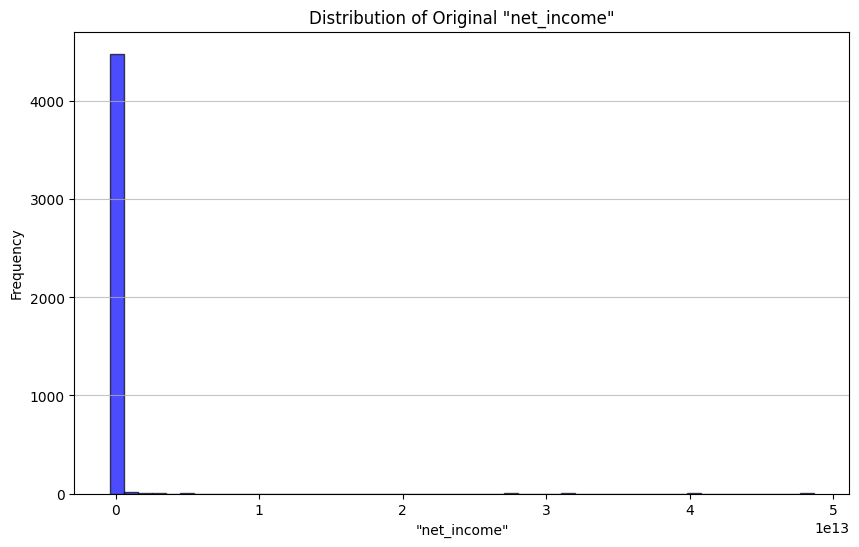

In [146]:
import matplotlib.pyplot as plt

# Assuming 'numric_df' is your DataFrame and 'net_income' is the column of interest
original_net_income = numric_df['net_income']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(original_net_income, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Original "net_income"')
plt.xlabel('"net_income"')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


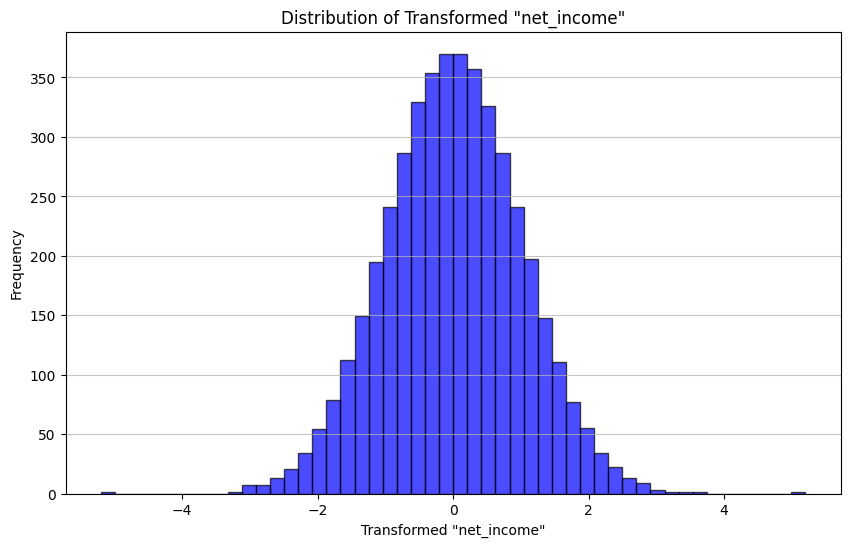

In [147]:
import matplotlib.pyplot as plt

# Assuming 'net_income' is the first column in numric_df, it will be the first column in X_transformed
# Adjust the column index [0] if 'net_income' is in a different position
net_income_transformed = X_transformed[:, 0]

# Now, plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(net_income_transformed, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Transformed "net_income"')
plt.xlabel('Transformed "net_income"')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [148]:
combined_data_Without_Categorical = np.concatenate([X_transformed, X_transformed_Indicators], axis=1)


# Convert the concatenated array to a DataFrame
combined_data_df_Without_Categorical = pd.DataFrame(combined_data_Without_Categorical)
combined_data_df_Without_Categorical.head(20)


0         1         2         3         4         5         6   \
0   0.142261 -0.149068  1.010553  0.218201 -0.070363  0.146053  0.194422   
1   0.089566 -0.139665  0.596510  0.150313 -0.069145  0.124244  0.194422   
2   0.184856 -0.018143  0.693935  0.275996 -0.059687  0.207881  0.194422   
3   0.297009  0.054572  0.715044 -0.261387 -5.199338  0.307700  0.194422   
4   0.564548  0.692222 -1.238880  0.997989 -0.126598  0.650418  0.194422   
5   0.629970  0.709348  0.972759  1.132673 -0.169008  0.676776  0.194422   
6   0.571669  0.712060 -0.978455  1.068915 -0.203914  0.648453  0.194422   
7   1.840011  1.558480 -1.348674  0.633317  2.578151  1.818903  0.194422   
8   1.986713  1.618355  1.378114  0.874001  2.551226  1.977251  0.194422   
9   2.008528  1.643234 -1.607794  0.921132  2.531827  2.003920  0.194422   
10  1.997098  1.634706 -1.747166  0.922330  2.513841  1.995100  0.194422   
11  0.967161  0.936223  0.036391  0.366873  1.179289  1.140937 -1.790504   
12  1.331279  1.059720  0.036391  0.985044  1.176216  1.390574 -2.000428   
13  1.133916  1.022622  0.036391  0.689399  1.169794  1.287103 -1.838202   
14  0.795513  0.980868  0.036391 -0.018237  1.169556  1.162809 -1.762509   
15  1.040682  1.096868 -2.701080  0.542749  1.336465  1.275119 -0.897451   
16  1.327429  1.169252 -2.393392  0.953943  1.363087  1.447121 -0.920412   
17  1.334844  1.189103 -2.370284  0.969427  1.364218  1.445800 -0.953493   
18  1.056832  1.158202 -2.577201  0.545592  1.358744  1.356097 -0.965420   
19  0.385238  0.588486  1.171966  1.274388 -0.797473  0.411920  0.194422   

          7         8         9   ...        12        13        14        15  \
0  -0.415634 -0.328416 -0.506348  ...  0.219057 -5.199338 -0.217963 -0.600511   
1  -0.415634 -1.103494  0.666949  ...  0.072856 -0.368215 -0.076601 -0.599596   
2  -0.415634 -0.990465  0.822128  ...  0.016338 -0.256212 -0.066047 -0.538735   
3  -0.415634 -0.897383  1.045933  ...  0.234190 -0.337363 -0.102585 -0.536174   
4  -0.415634  0.480622  1.258505  ...  0.673032  0.552898  0.647708 -1.220640   
5  -0.415634  0.392987  1.316185  ...  0.715370  0.585426  0.662261 -1.220640   
6  -0.415634  0.108326  1.139900  ...  0.686409  0.596990  0.673401 -1.220640   
7   2.207497  1.385800  2.472241  ...  1.876802  1.547978  1.803257  1.798546   
8   2.244048  1.368797  2.652689  ...  1.961216  1.596097  1.843912  1.876946   
9   2.318297  1.314403  2.583840  ...  2.051613  1.549296  1.786364  1.939787   
10  2.373851  1.342938  2.574330  ...  1.998624  1.534341  1.777323  1.983017   
11 -0.415634  1.015244 -0.506348  ...  1.026243  0.949894  1.116386  0.892573   
12 -0.415634  1.071358 -0.506348  ...  1.424816  0.935693  1.115300  0.889742   
13 -0.415634  1.045108 -0.506348  ...  1.242978  0.969202  1.141352  0.889085   
14 -0.415634  0.956400 -0.506348  ...  1.017062  1.029991  1.162886  0.889085   
15  1.919643  1.046727  1.757968  ...  1.425040  1.480392  1.678704  0.099274   
16  1.969812  1.095564  2.089616  ...  1.517479  1.450395  1.634735  0.099274   
17  1.929866  1.074959  1.977009  ...  1.511049  1.426479  1.618661  0.099274   
18  2.008466  1.184171  2.213598  ...  1.461303  1.390908  1.600529  0.099274   
19 -0.415634 -1.280507 -0.506348  ...  0.639421  0.345940  0.426556 -0.497809   

          16        17        18        19        20        21  
0   0.139710 -5.199338 -0.969381  0.631265  0.793008  1.562846  
1   0.139710 -5.199338 -0.483657  0.429510  0.318356  0.984872  
2   0.139710 -5.199338 -0.369487  0.449153  0.620042  1.230597  
3   0.139710 -5.199338 -0.539364  0.626566  0.852729  1.656136  
4  -0.874492  1.122266  0.557981  0.015626  0.400219  0.436699  
5  -0.855157  1.196621  0.707492  0.074439  0.702622  0.538172  
6  -0.961225  1.230306  0.904992 -0.008315  0.662484  0.439005  
7  -1.371492 -5.199338  1.084670  0.831484  1.588616  1.571164  
8   1.637772 -5.199338  1.190694  1.022584  1.799077  2.014603  
9  -2.277526 -5.199338  1.301063  0.999148  1.874883  2.06585

## TSNE


### TSNE For Mixed DateSet 3D

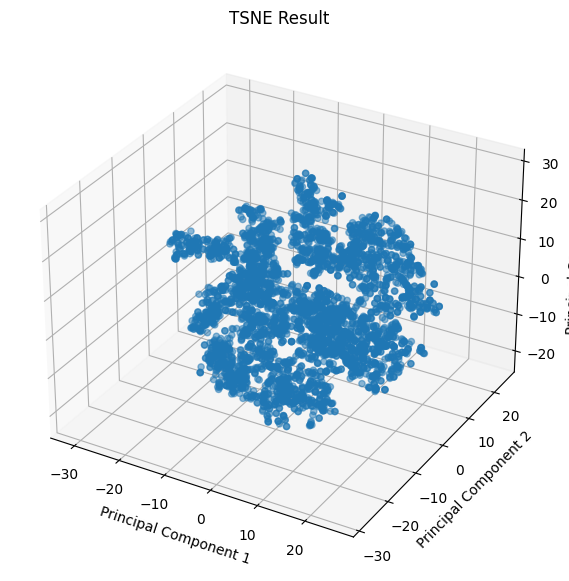

In [149]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne3 = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne3[:, 0], combined_data_tsne3[:, 1], combined_data_tsne3[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()



### TSNE For Not Mixed DateSet 3D

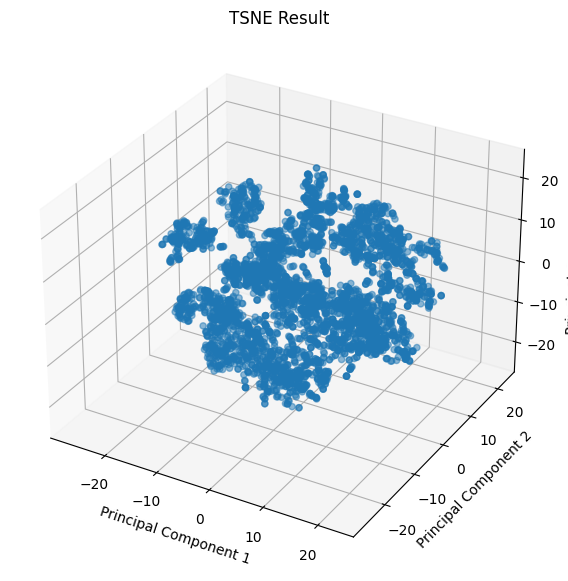

In [150]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne3N = tsne.fit_transform(combined_data_df_Without_Categorical)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne3N[:, 0], combined_data_tsne3N[:, 1], combined_data_tsne3N[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()


### TSNE For Mixed DateSet 2D

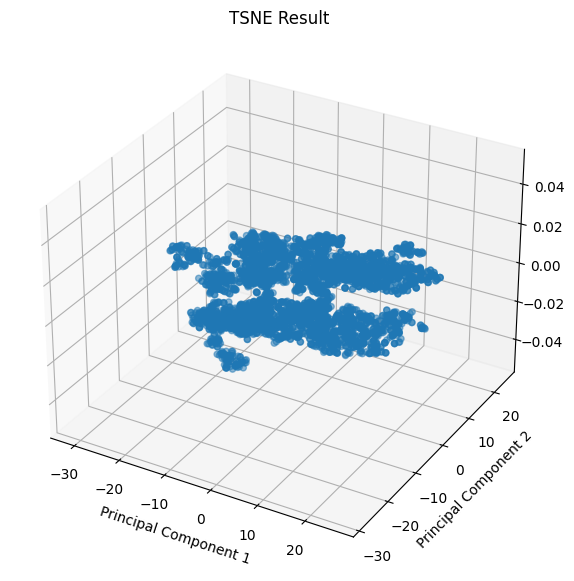

In [151]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Now apply t-SNE to the combined data
tsne2 = TSNE(n_components=2, perplexity=30, random_state=0)
combined_data_tsne2 = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('TSNE Result')
plt.show()



### TSNE For Not Mixed DateSet 2D

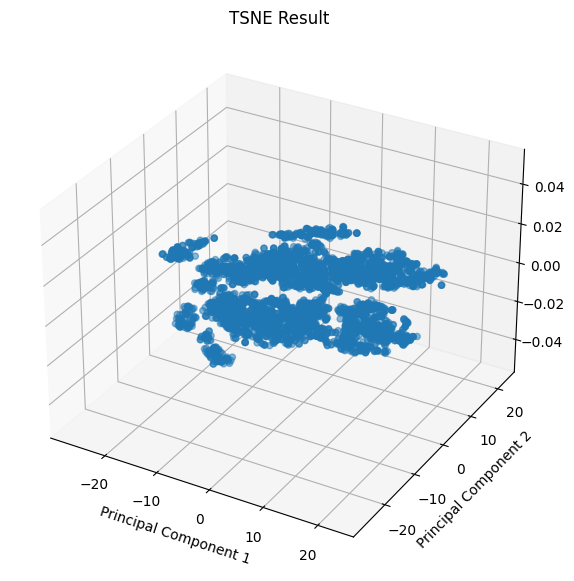

In [152]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Now apply t-SNE to the combined data
tsne2 = TSNE(n_components=2, perplexity=30, random_state=0)
combined_data_tsne2N = tsne.fit_transform(combined_data_df_Without_Categorical)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('TSNE Result')
plt.show()


## TSNE DBSCAN 3D for mixed 

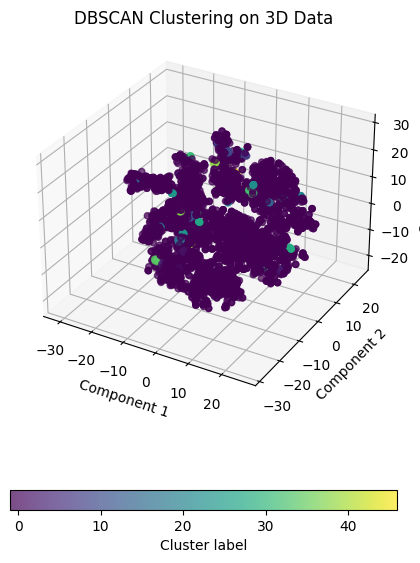

Silhouette Score for DBSCAN: -0.643


In [153]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Your DBSCAN clustering setup remains the same
eps_optimal = 0.7  # Adjust based on your dataset
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne3)

# Plotting the result in a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Set up a 3D projection

# Store the output of the scatter plot in a variable
scatter = ax.scatter(combined_data_tsne3[:, 0], combined_data_tsne3[:, 1], combined_data_tsne3[:, 2], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('DBSCAN Clustering on 3D Data')

# Use the scatter plot object as the mappable for colorbar creation
plt.colorbar(scatter, label='Cluster label', shrink=0.5, orientation='horizontal')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne3, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 3D for not mixed 

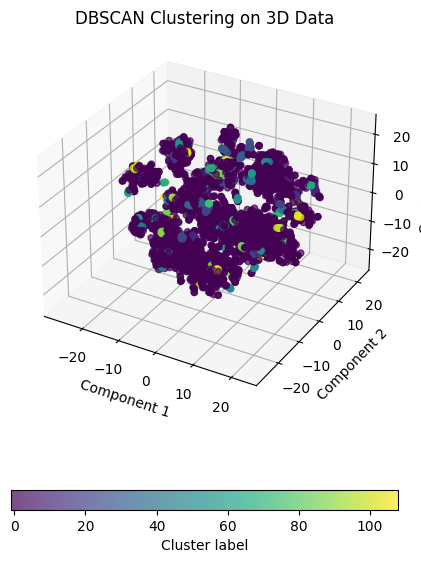

Silhouette Score for DBSCAN: -0.532


In [154]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Your DBSCAN clustering setup remains the same
eps_optimal = 0.7  # Adjust based on your dataset
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne3N)

# Plotting the result in a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Set up a 3D projection

# Store the output of the scatter plot in a variable
scatter = ax.scatter(combined_data_tsne3N[:, 0], combined_data_tsne3N[:, 1], combined_data_tsne3N[:, 2], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('DBSCAN Clustering on 3D Data')

# Use the scatter plot object as the mappable for colorbar creation
plt.colorbar(scatter, label='Cluster label', shrink=0.5, orientation='horizontal')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne3N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 2D for mixed 

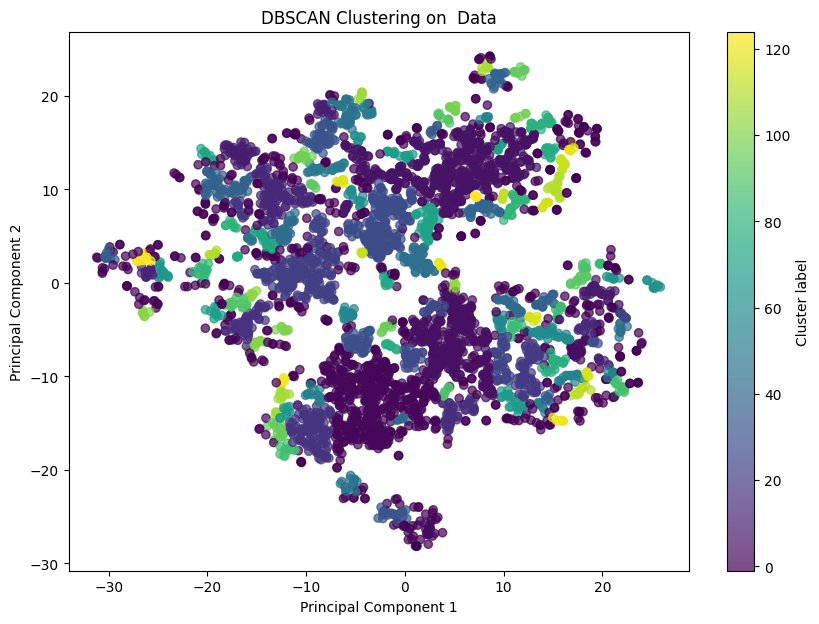

Silhouette Score for DBSCAN: -0.363


In [155]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne2[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on  Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne2, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 2D for not mixed 

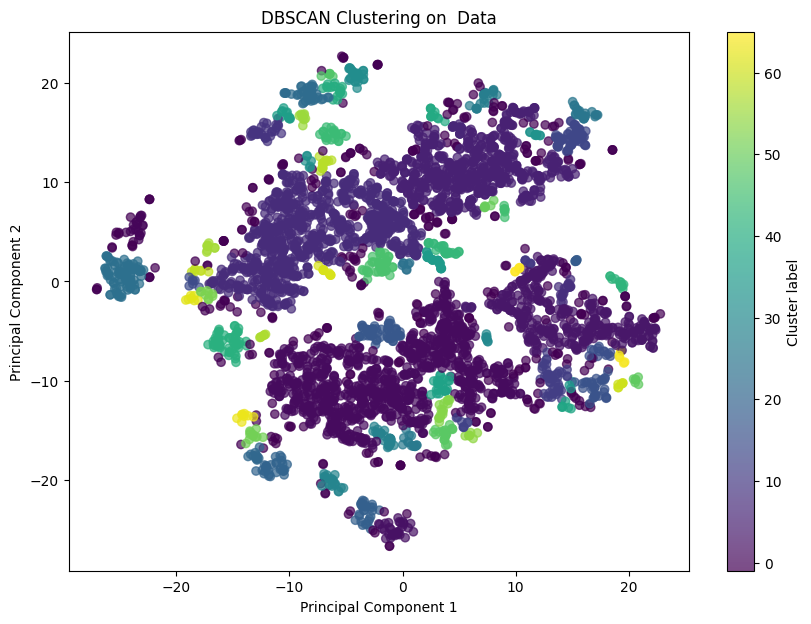

Silhouette Score for DBSCAN: -0.330


In [156]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne2N[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on  Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne2N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

## TSNE Kmeans 2D for mixed 

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


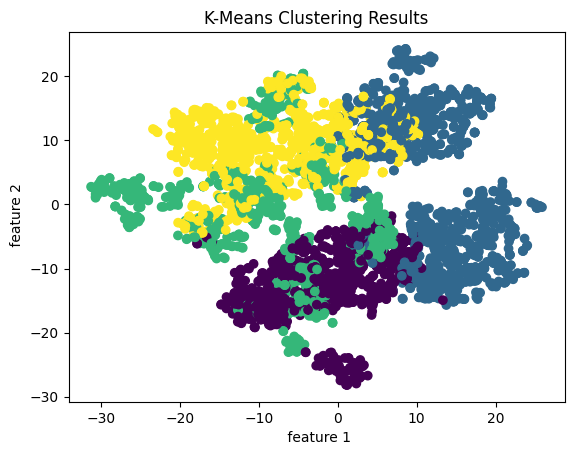

In [157]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(combined_data_tsne2)

# Plotting the results
plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


# TSNE Kmeans 2D for not mixed

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


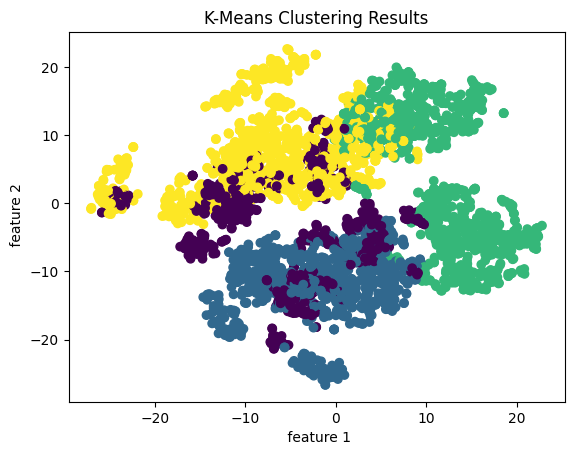

In [158]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(combined_data_tsne2N)

# Plotting the results
plt.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


## PCA For Mixed DateSet 3D

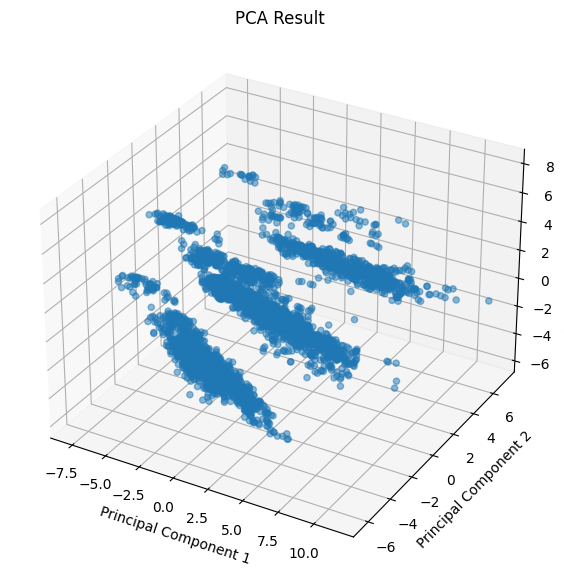

In [159]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

pca3 = PCA(n_components=n_components)

# Fit PCA on the dataset and transform the data
pca_result3 = pca3.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()


## PCA For Not Mixed DateSet 3D

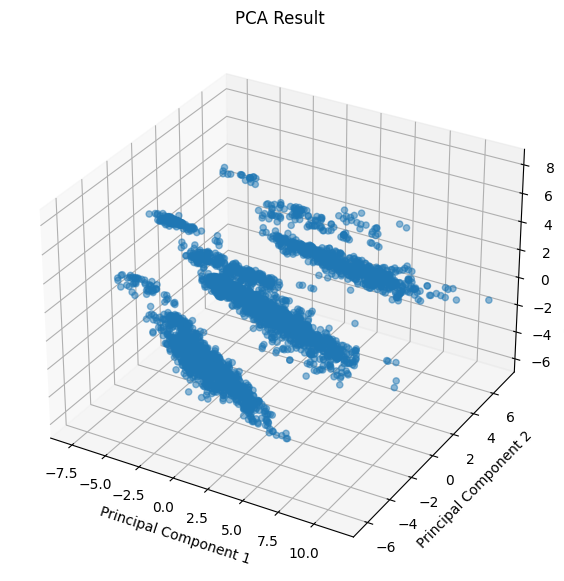

In [160]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

pca3N = PCA(n_components=n_components)

# Fit PCA on the dataset and transform the data
pca_result3N = pca3N.fit_transform(combined_data_df_Without_Categorical)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

## PCA for Robust Scaling 3D not mixed

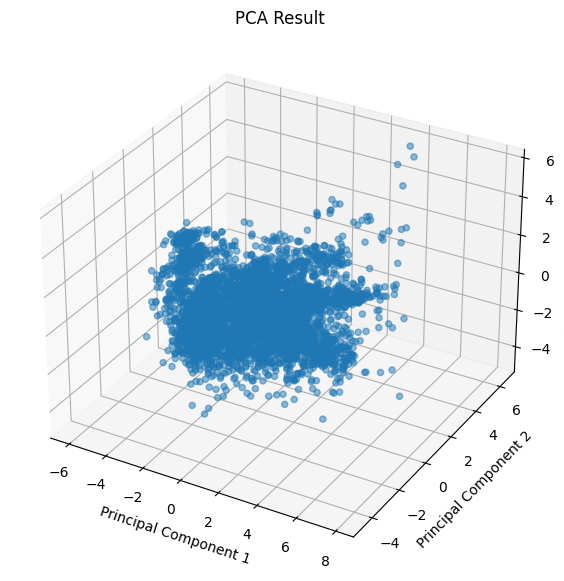

In [417]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

pca3NR = PCA(n_components=n_components)

# Fit PCA on the dataset and transform the data
pca_result3NR = pca3NR.fit_transform(RobustScaled_data_Without_Categorical)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

## PCA For Mixed DateSet 2D

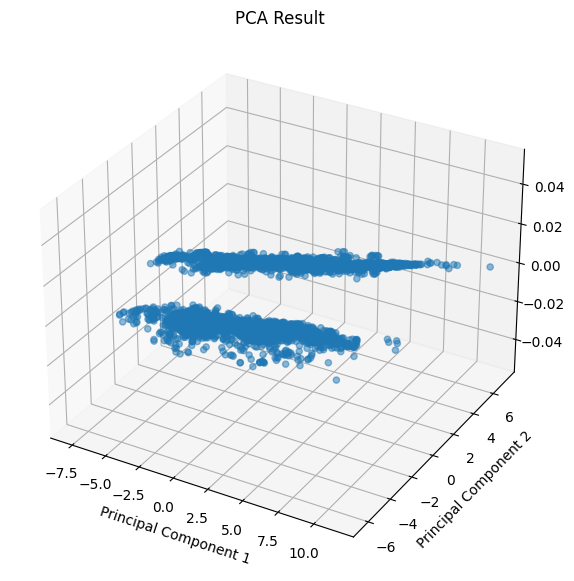

In [161]:

n_components = 2

pca2 = PCA(n_components=n_components)

# Fit PCA on the dataset and transform the data
pca_result2 = pca2.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result2[:, 0], pca_result2[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

## PCA For Not Mixed DateSet 2D

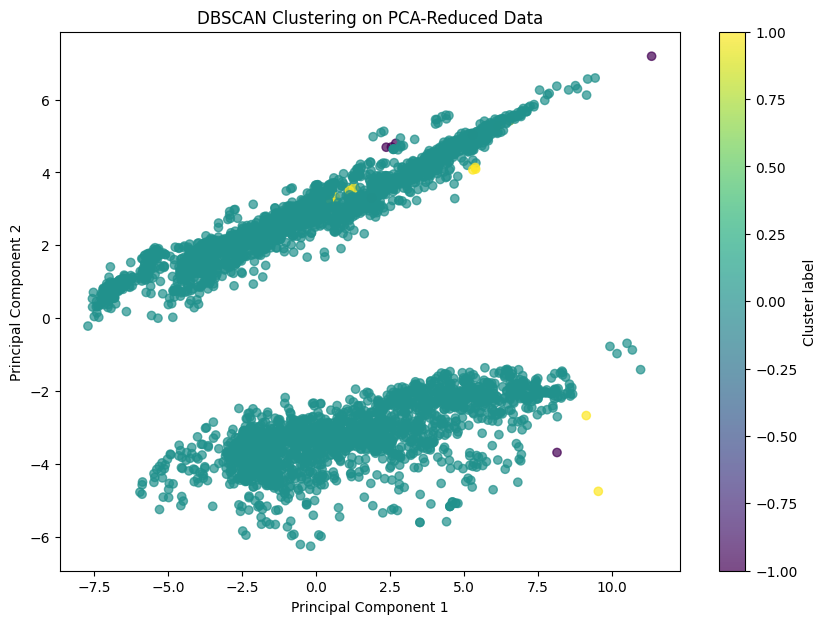

In [422]:
n_components = 2

pca2N = PCA(n_components=n_components)

# Fit PCA on the dataset and transform the data
pca_result2N = pca2N.fit_transform(combined_data_df_Without_Categorical)


plt.figure(figsize=(10, 7))
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()

## PCA Robust 2D not mixed

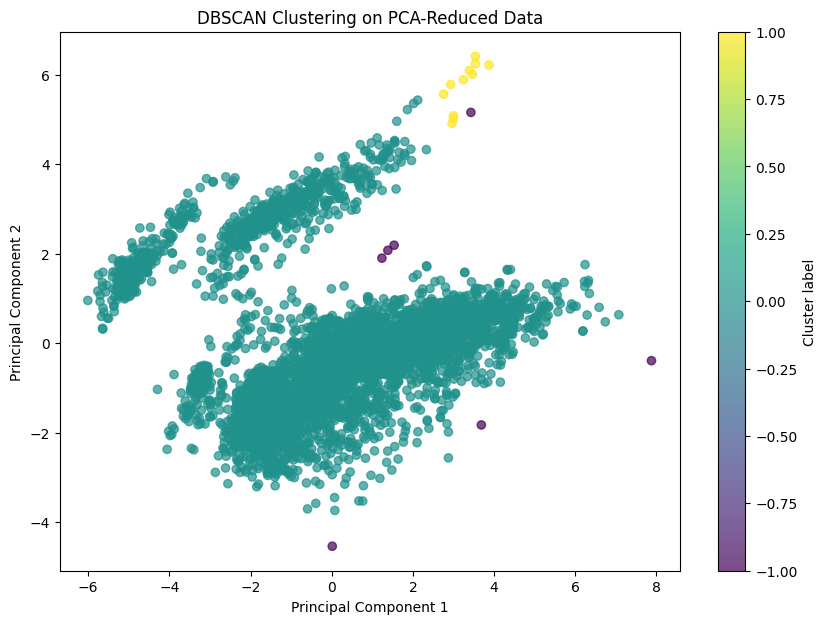

Silhouette Score for DBSCAN: 0.273


In [423]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_result2NR[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result2NR[:, 0], pca_result2NR[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result2NR, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  PCA DBSCAN 3D for mixed 

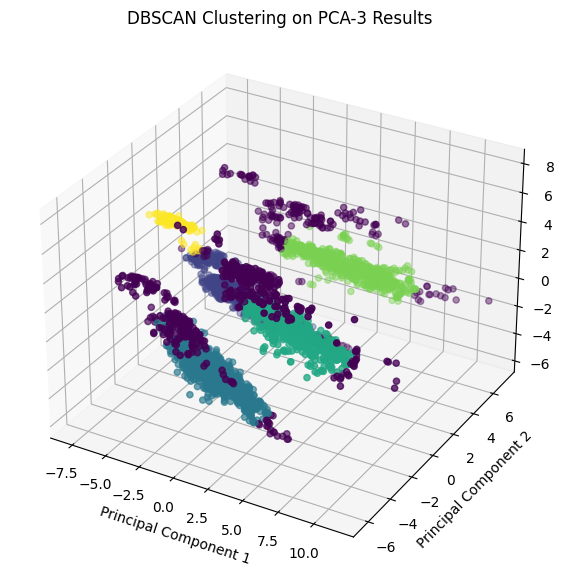

In [163]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'pca_result' is the result of PCA with at least 3 components
eps_optimal = 1.5

# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=200)
dbscan_labels = dbscan.fit_predict(pca_result3)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=dbscan_labels, cmap='viridis')

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()


##  PCA DBSCAN 3D for Not mixed 

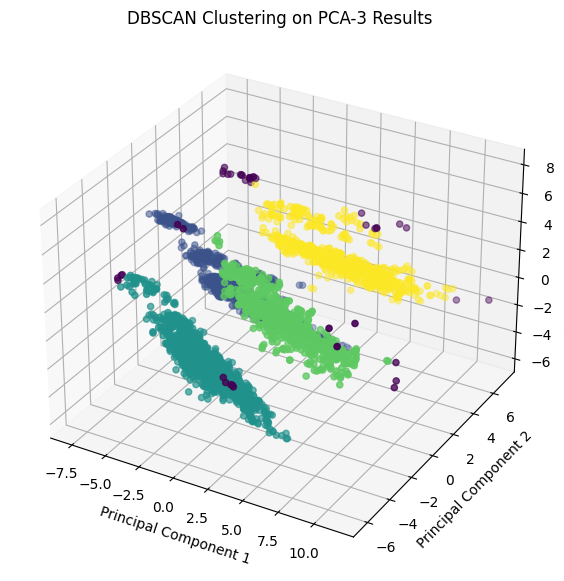

Silhouette Score for DBSCAN: 0.495


In [282]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'pca_result' is the result of PCA with at least 3 components
eps_optimal = 2
# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3N)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=dbscan_labels, cmap='viridis')

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

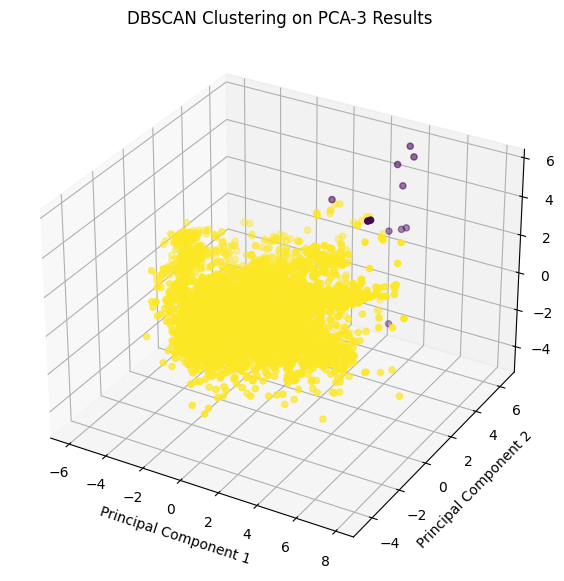

Silhouette Score for DBSCAN: 0.494


In [424]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'pca_result' is the result of PCA with at least 3 components
eps_optimal = 2
# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3NR)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=dbscan_labels, cmap='viridis')

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3NR, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

In [284]:
## Without PCA Just Not Mixed
eps_optimal = 2
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(combined_data_df_Without_Categorical)
silhouette_avg_dbscan = silhouette_score(combined_data_df_Without_Categorical, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

Silhouette Score for DBSCAN: -0.120


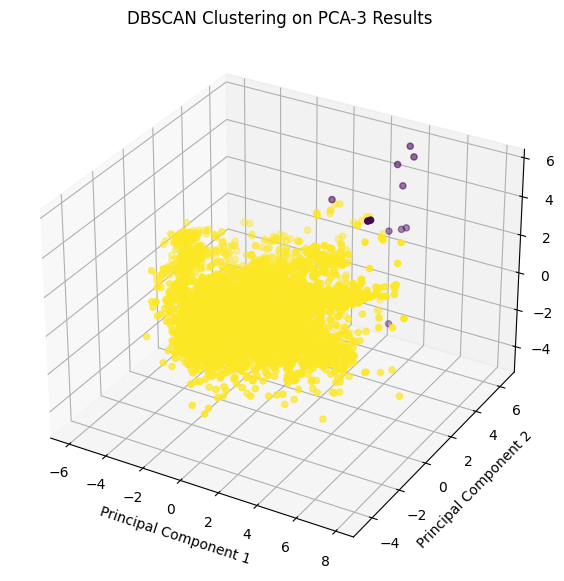

Silhouette Score for DBSCAN: 0.494


In [418]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'pca_result' is the result of PCA with at least 3 components
eps_optimal = 2
# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3NR)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=dbscan_labels, cmap='viridis')

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3NR, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

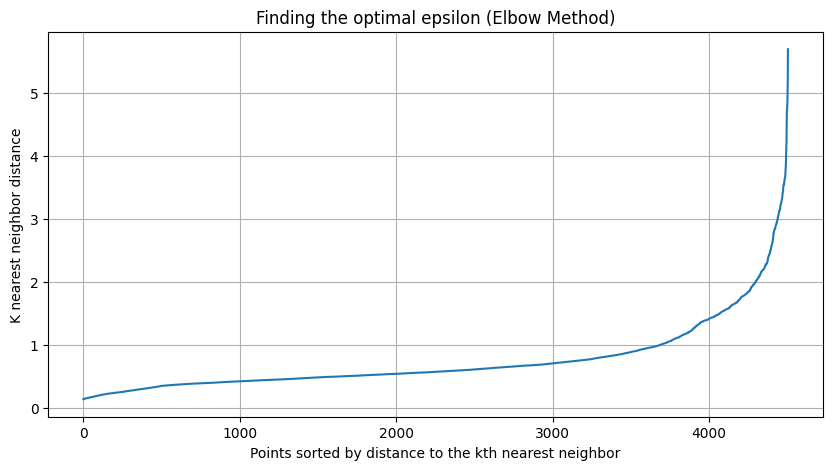

In [281]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


min_samples = 60

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3N)
distances, indices = neighbors.kneighbors(pca_result3N)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


##  PCA DBSCAN 2D for  mixed 

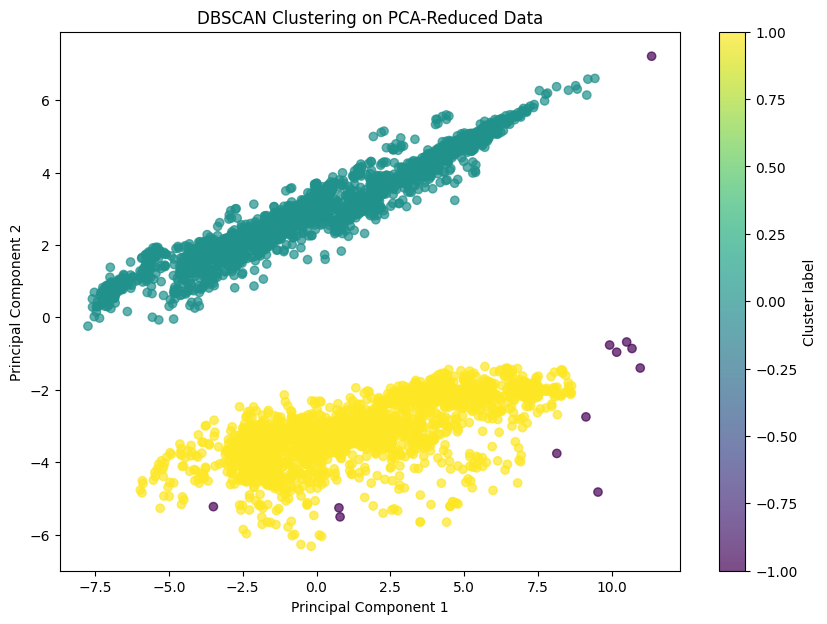

Silhouette Score for DBSCAN: 0.427


In [165]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_result2[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result2, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  PCA DBSCAN 2D for Not mixed 

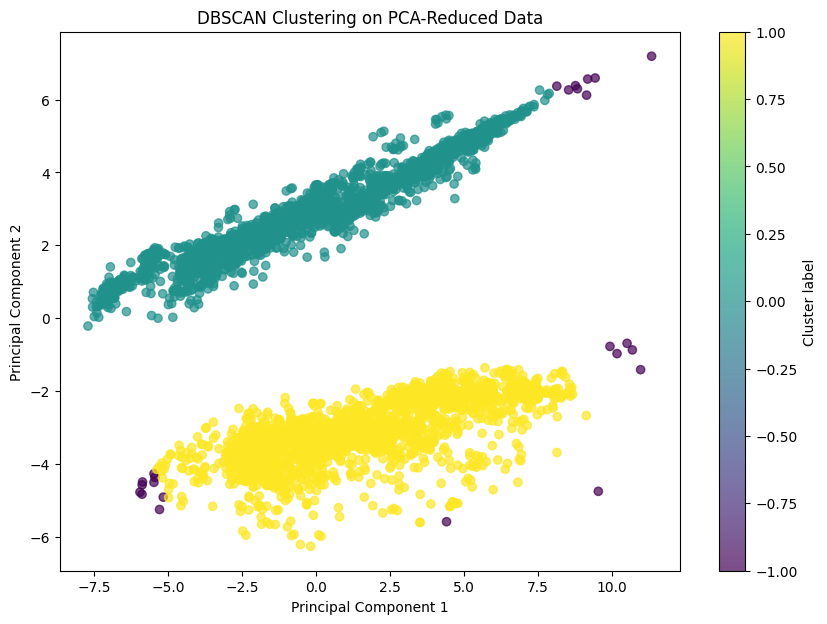

Silhouette Score for DBSCAN: 0.465


In [323]:
from sklearn.cluster import DBSCAN

eps_optimal = 1.4

dbscan = DBSCAN(eps=eps_optimal, min_samples=100)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_result2N[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result2N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

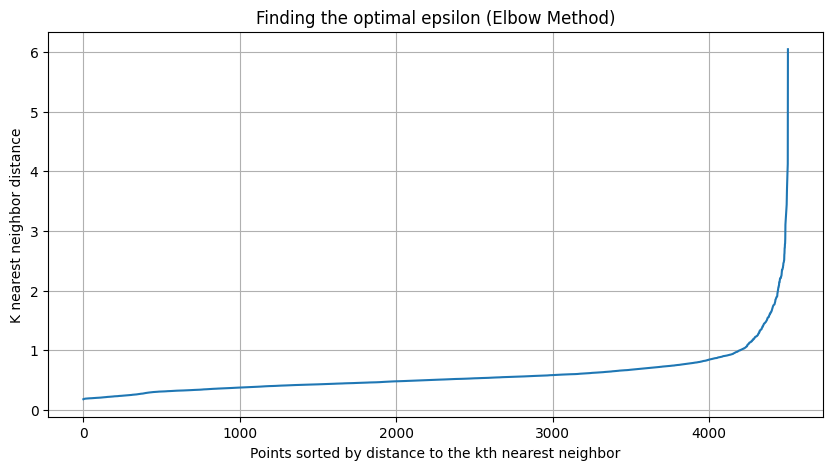

In [324]:
min_samples = 100
# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result2N)
distances, indices = neighbors.kneighbors(pca_result2N)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


## Find Best Epsilon

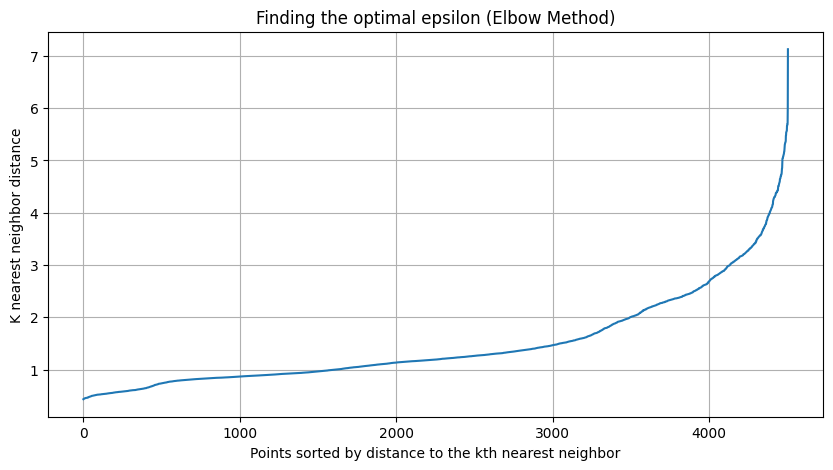

In [167]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 200

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3)
distances, indices = neighbors.kneighbors(pca_result3)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


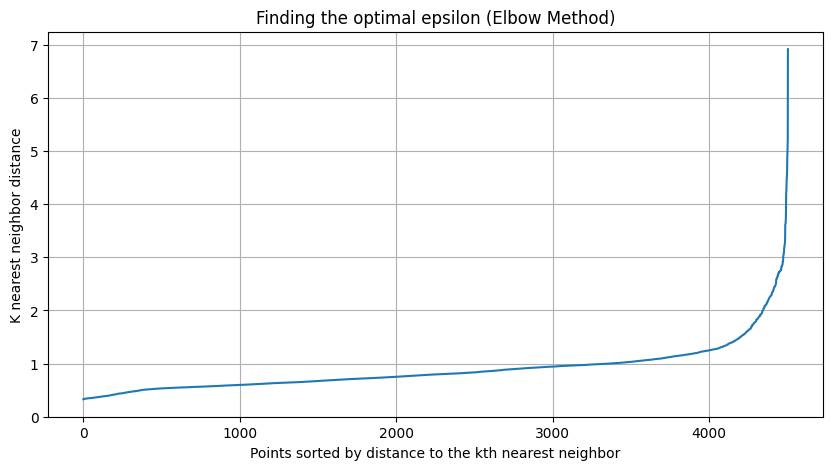

In [168]:
min_samples = 200

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result2)
distances, indices = neighbors.kneighbors(pca_result2)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


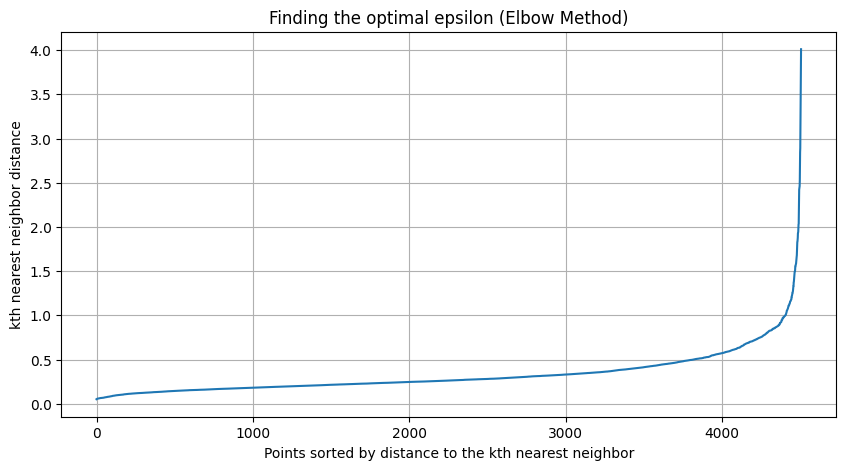

In [169]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 10

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3N)
distances, indices = neighbors.kneighbors(pca_result3N)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('kth nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


## Find Best K

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

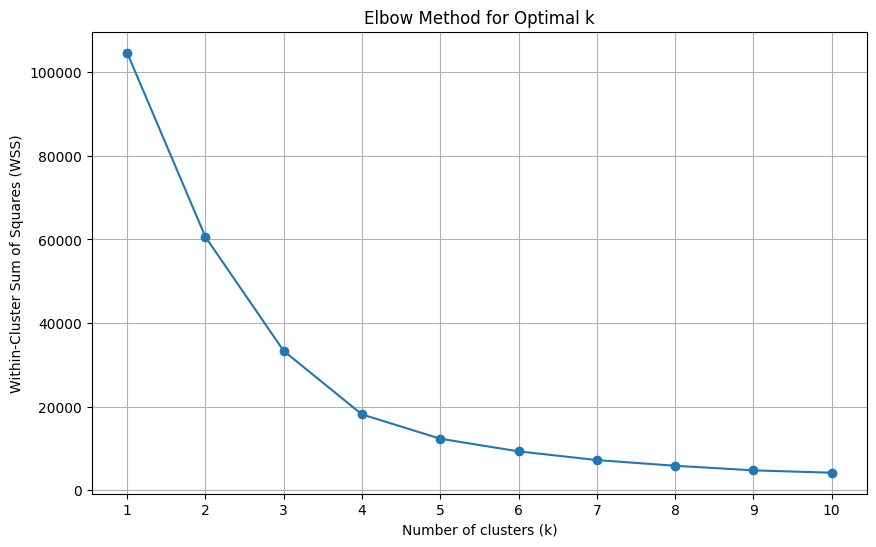

In [326]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is your dataset ready for clustering

# Decide the range of k values to evaluate
k_values = range(1, 11)  # For example, from 1 to 10

# Initialize an empty list to store the WSS for each k
wss_values = []

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit KMeans on the dataset
    kmeans.fit(pca_result2N)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### PCA Kmeans for Mixed 2D


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


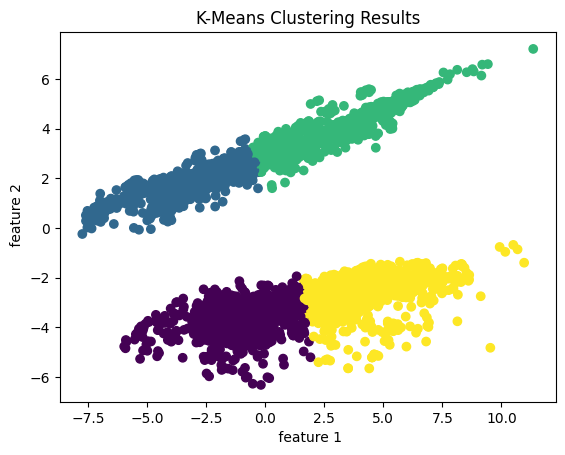

Silhouette Score for 4 clusters: 0.560


In [171]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result2)

# Plotting the results
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## PCA Kmeans for not mixed 2D

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


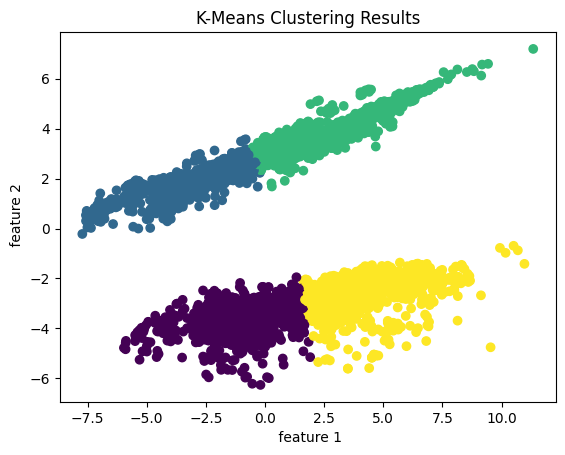

Silhouette Score for 4 clusters: 0.562


In [330]:


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result2N)

# Plotting the results
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


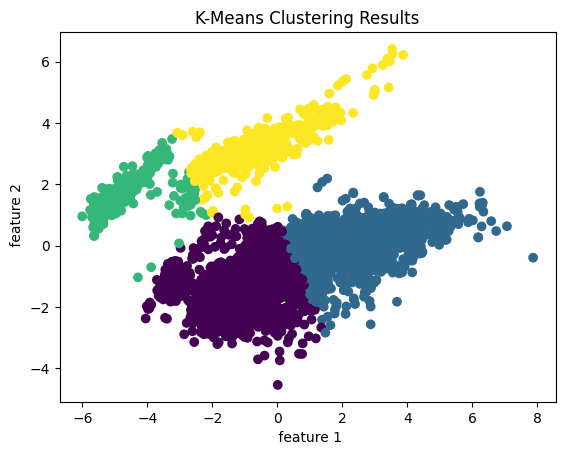

Silhouette Score for 4 clusters: 0.522


In [425]:


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result2NR)

# Plotting the results
plt.scatter(pca_result2NR[:, 0], pca_result2NR[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2NR, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

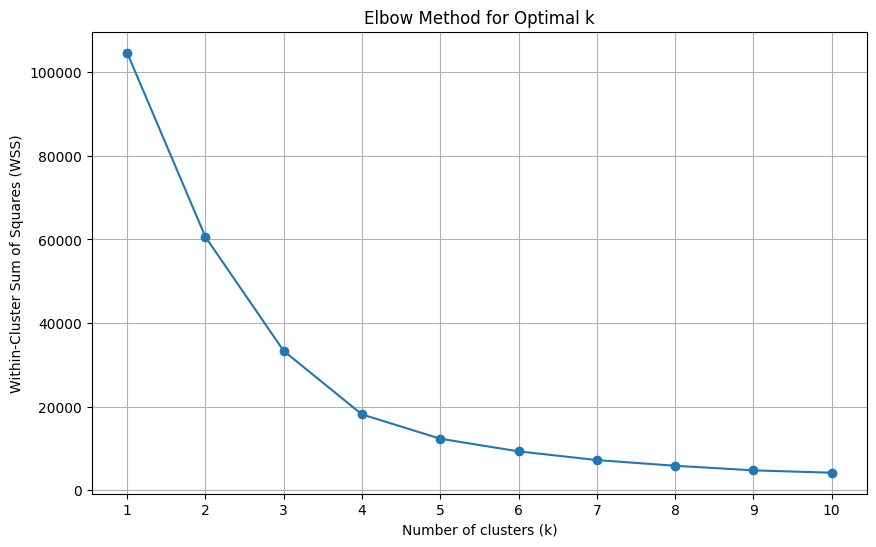

In [327]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is your dataset ready for clustering

# Decide the range of k values to evaluate
k_values = range(1, 11)  # For example, from 1 to 10

# Initialize an empty list to store the WSS for each k
wss_values = []

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit KMeans on the dataset
    kmeans.fit(pca_result2N)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Labels of what we want

In [173]:


# Assuming kmeans_labels is an array of labels you want to add as a new column
combined_data_df['Predicted_Class'] = kmeans_labels
combined_data_df.head(20)
combined_data_df.columns
combined_data_df.head()

0         1         2         3         4         5         6  \
0  0.142261 -0.149068  1.010553  0.218201 -0.070363  0.146053  0.194422   
1  0.089566 -0.139665  0.596510  0.150313 -0.069145  0.124244  0.194422   
2  0.184856 -0.018143  0.693935  0.275996 -0.059687  0.207881  0.194422   
3  0.297009  0.054572  0.715044 -0.261387 -5.199338  0.307700  0.194422   
4  0.564548  0.692222 -1.238880  0.997989 -0.126598  0.650418  0.194422   

          7         8         9  ...   37   38   39   40   41   42   43   44  \
0 -0.415634 -0.328416 -0.506348  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -0.415634 -1.103494  0.666949  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.415634 -0.990465  0.822128  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.415634 -0.897383  1.045933  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.415634  0.480622  1.258505  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45  Predicted_Class  
0  0.0                1  
1  0.0                1  
2  0.0                0  
3  0.0                0  
4  0.0                3  

[5 rows x 47 columns]

## PCA Kmeans for  mixed 3D

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


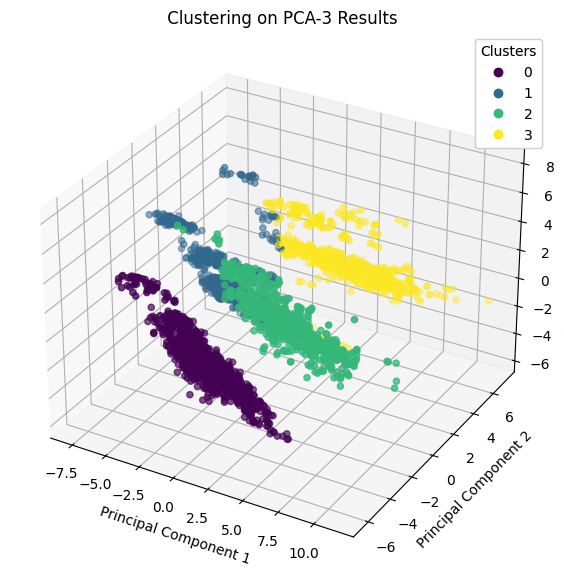

Silhouette Score for 4 clusters: 0.486


In [174]:

k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## PCA K-means for not mixed

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


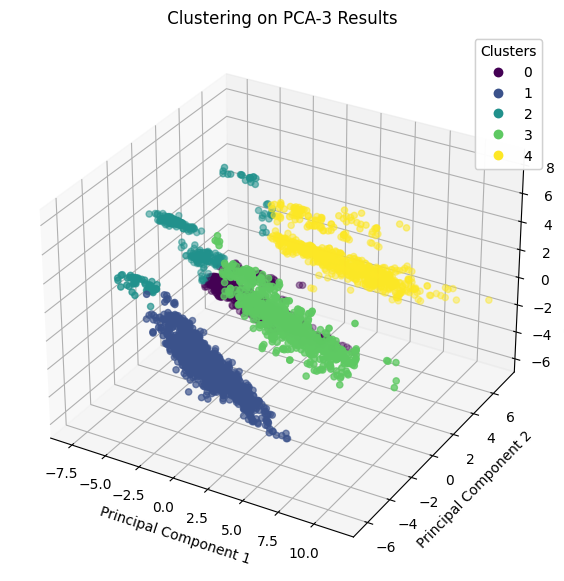

Silhouette Score for 5 clusters: 0.521


In [338]:
k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


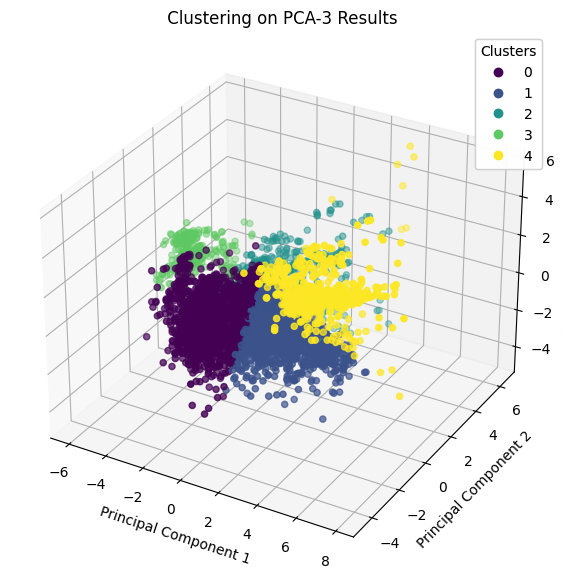

Silhouette Score for 5 clusters: 0.376


In [426]:
k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3NR)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3NR, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

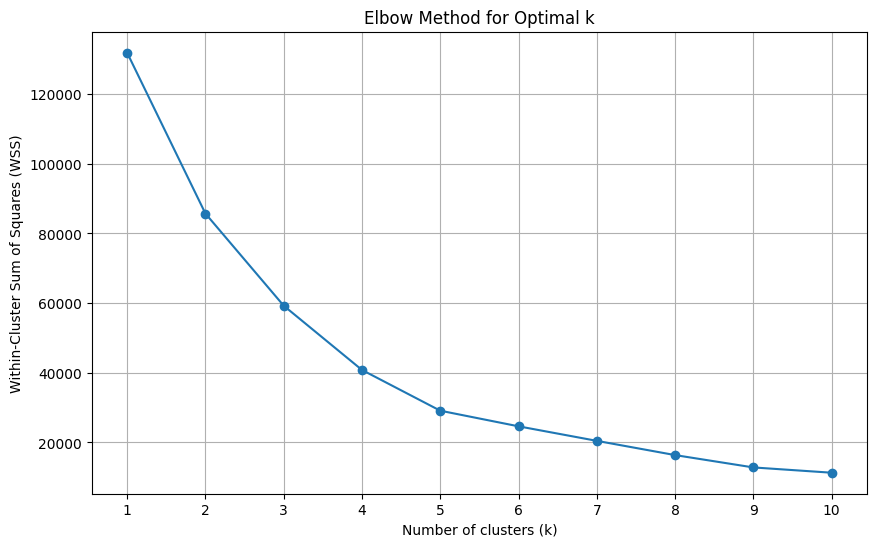

In [331]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is your dataset ready for clustering

# Decide the range of k values to evaluate
k_values = range(1, 11)  # For example, from 1 to 10

# Initialize an empty list to store the WSS for each k
wss_values = []

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit KMeans on the dataset
    kmeans.fit(pca_result3N)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## EM PCA 2D for mixed

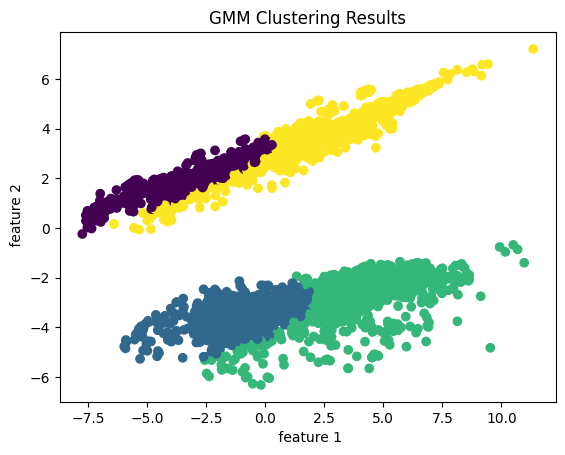

Silhouette Score for 4 clusters: 0.477


In [176]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Number of components (clusters) to fit
n_components = 4
 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result2)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, gmm_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## EM PCA 2D for not mixed

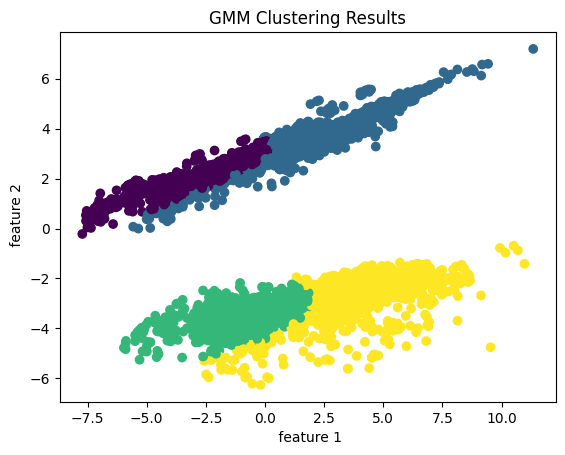

Silhouette Score for 4 clusters: 0.490


In [345]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Number of components (clusters) to fit
n_components = 4
 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result2N)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")

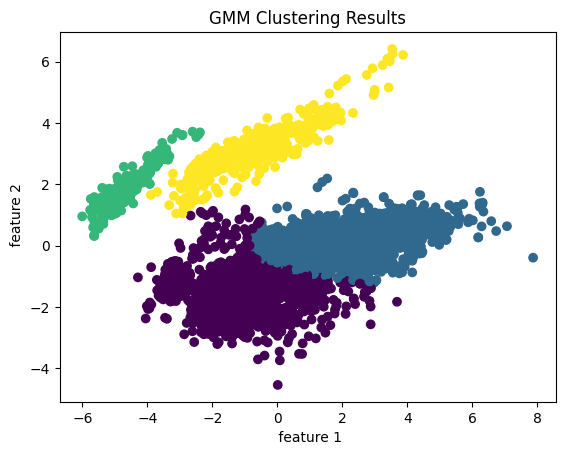

Silhouette Score for 4 clusters: 0.493


In [427]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Number of components (clusters) to fit
n_components = 4
 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result2NR)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result2NR[:, 0], pca_result2NR[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2NR, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")

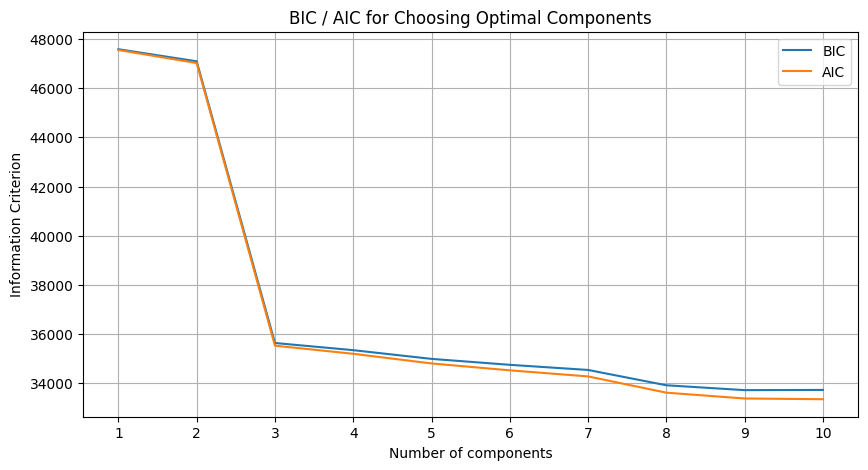

In [339]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your 2D dataset after PCA
n_components_range = range(1, 11)  # Range of possible components
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_result2N)
    bics.append(gmm.bic(pca_result2N))
    aics.append(gmm.aic(pca_result2N))

# Plotting the BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC / AIC for Choosing Optimal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


## EM PCA 3D for mixed

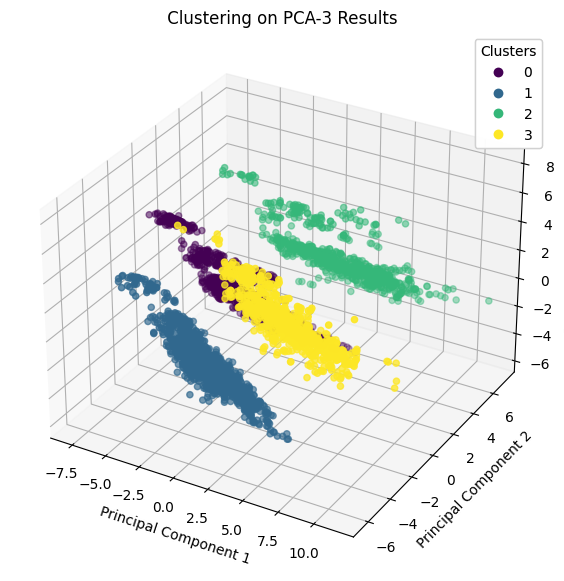

Silhouette Score for 4 clusters: 0.492


In [178]:
# Number of components (clusters) to fit
n_components = 4 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, gmm_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## EM PCA 3D for not mixed

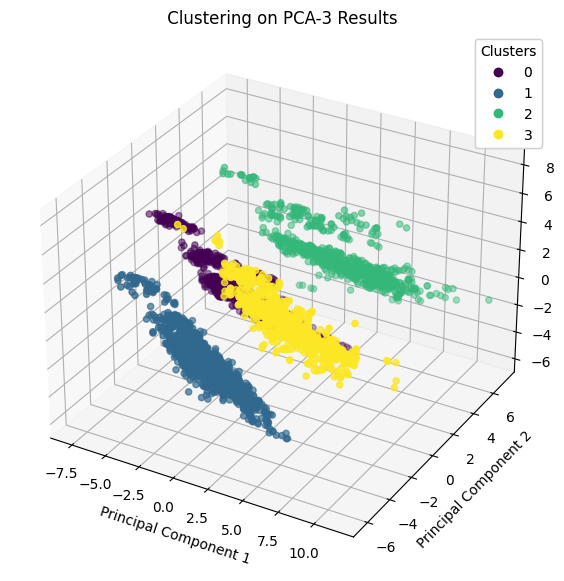

Silhouette Score for 4 clusters: 0.497


In [350]:
# Number of components (clusters) to fit
n_components = 4# Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result3N)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")

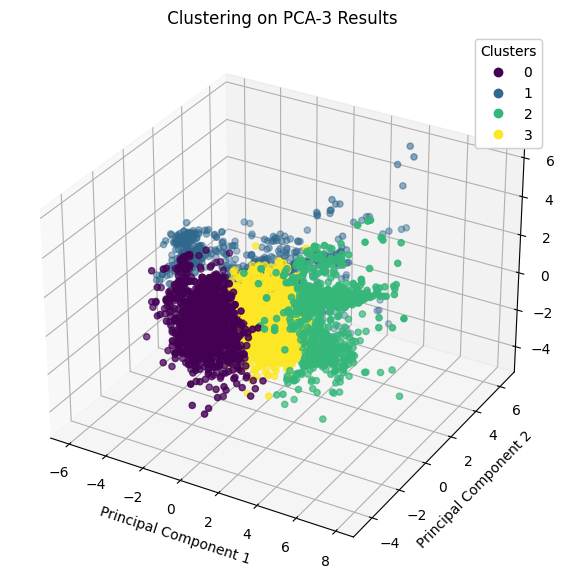

Silhouette Score for 4 clusters: 0.314


In [428]:
# Number of components (clusters) to fit
n_components = 4# Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result3NR)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3NR, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")

## Find best N for EM 

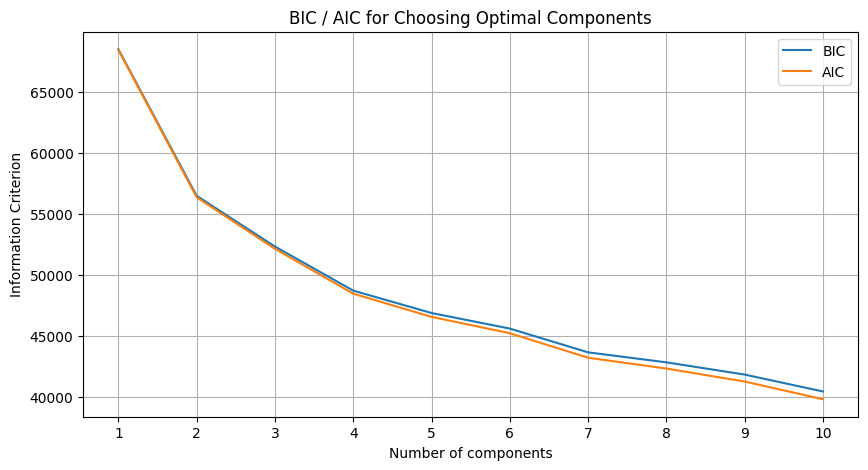

In [346]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your 2D dataset after PCA
n_components_range = range(1, 11)  # Range of possible components
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_result3N)
    bics.append(gmm.bic(pca_result3N))
    aics.append(gmm.aic(pca_result3N))

# Plotting the BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC / AIC for Choosing Optimal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


## Hierarchical PCA 2D for mixed

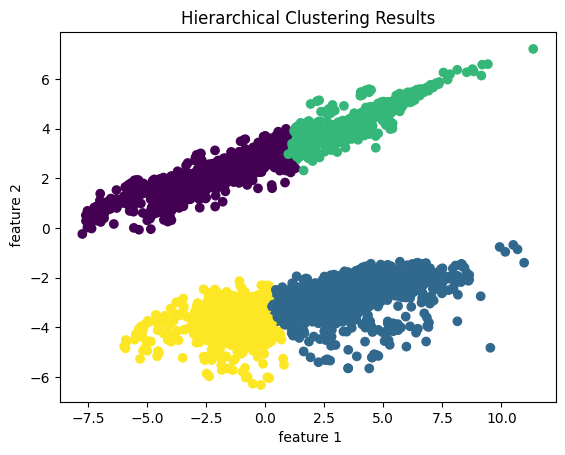

Silhouette Score for 4 clusters: 0.525


In [181]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(pca_result2)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, hierarchical_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## Hierarchical PCA 2D for not mixed

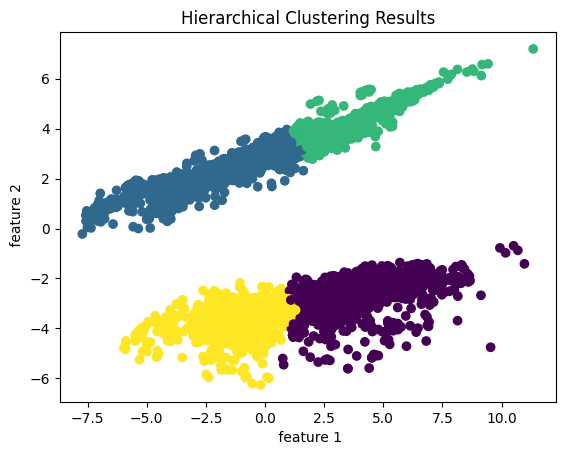

Silhouette Score for clusters: 0.539


In [380]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt


hierarchical = AgglomerativeClustering(n_clusters=4, linkage='complete')
hierarchical_labels = hierarchical.fit_predict(pca_result2N)

plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, hierarchical_labels)

print(f"Silhouette Score for clusters: {silhouette_avg:.3f}")

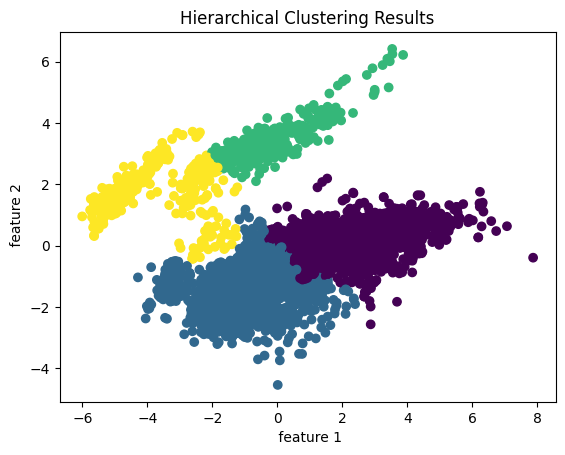

Silhouette Score for clusters: 0.488


In [429]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt


hierarchical = AgglomerativeClustering(n_clusters=4, linkage='complete')
hierarchical_labels = hierarchical.fit_predict(pca_result2NR)

plt.scatter(pca_result2NR[:, 0], pca_result2NR[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2NR, hierarchical_labels)

print(f"Silhouette Score for clusters: {silhouette_avg:.3f}")

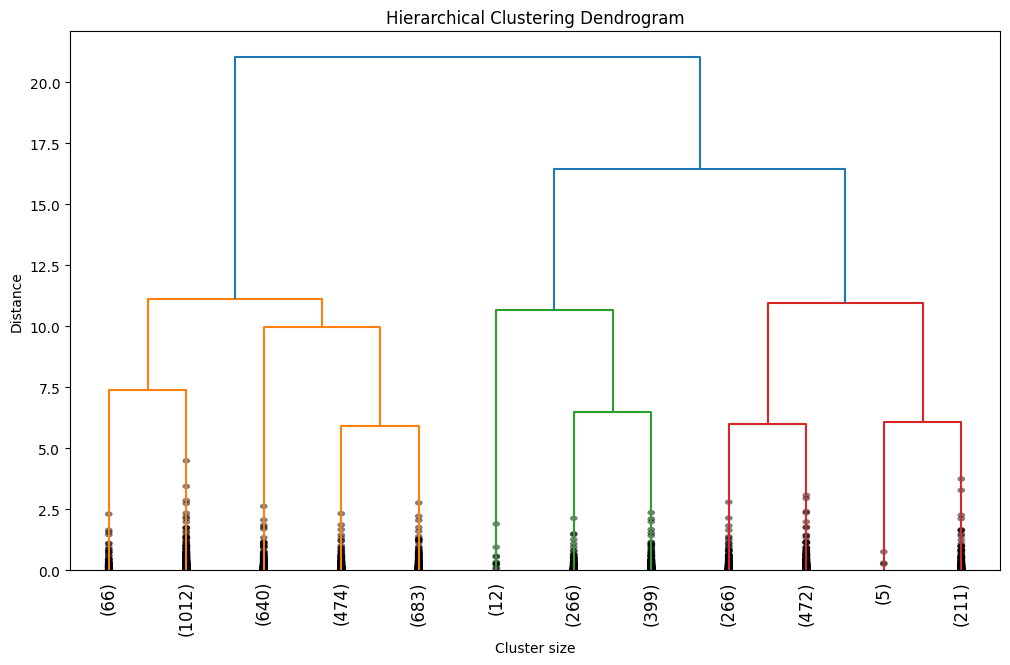

In [381]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your dataset after dimensionality reduction
# Generate the linkage matrix using Ward's method
Z = linkage(pca_result2N, 'complete')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# This line draws a threshold line to help identify the number of clusters
plt.axhline(y=25, color='r', linestyle='--')  # Adjust 'y' based on your dendrogram

plt.show()


## Hierarchical PCA 3D for mixed

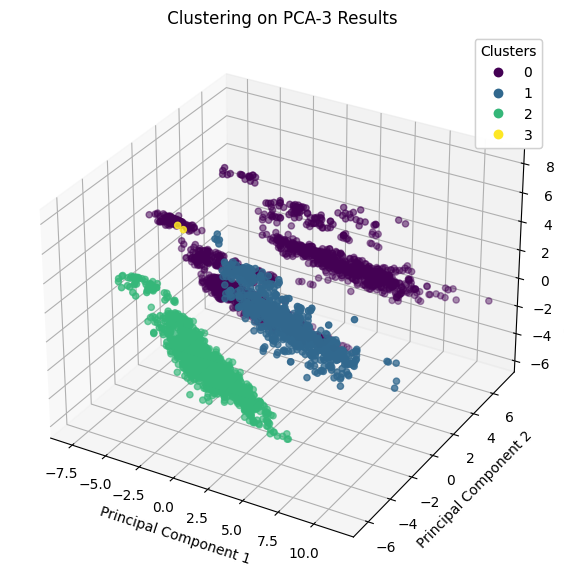

Silhouette Score for 4 clusters: 0.343


In [183]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='single') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, hierarchical_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## Hierarchical PCA 3D for Not mixed

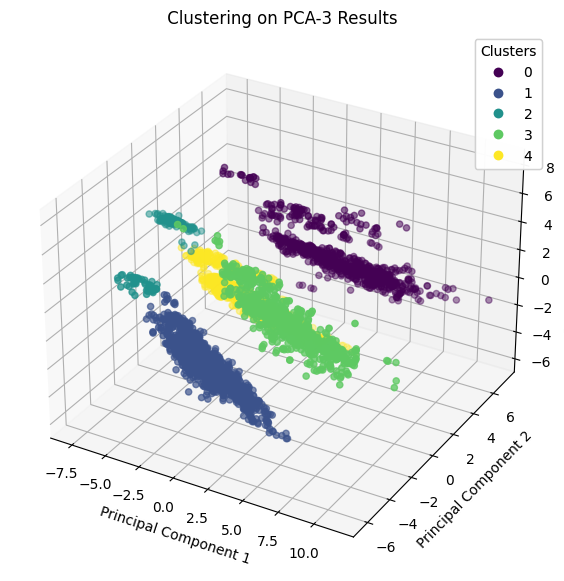

Silhouette Score for  clusters: 0.517


In [408]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='average') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, hierarchical_labels)

print(f"Silhouette Score for  clusters: {silhouette_avg:.3f}")

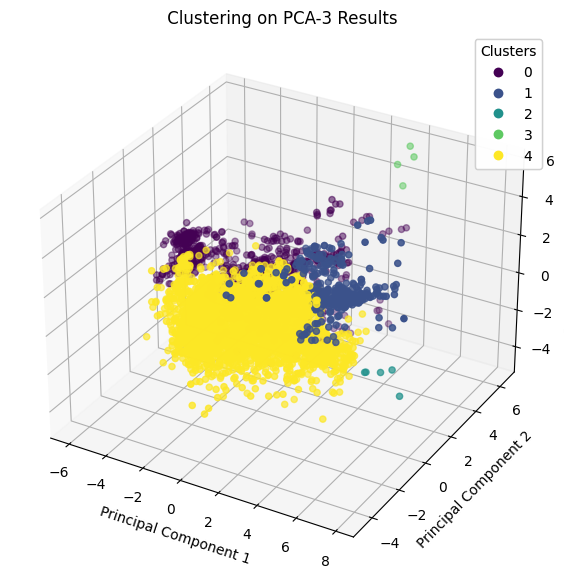

Silhouette Score for  clusters: 0.297


In [430]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='average') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3NR)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3NR, hierarchical_labels)

print(f"Silhouette Score for  clusters: {silhouette_avg:.3f}")

## Dendrogram For finding best n

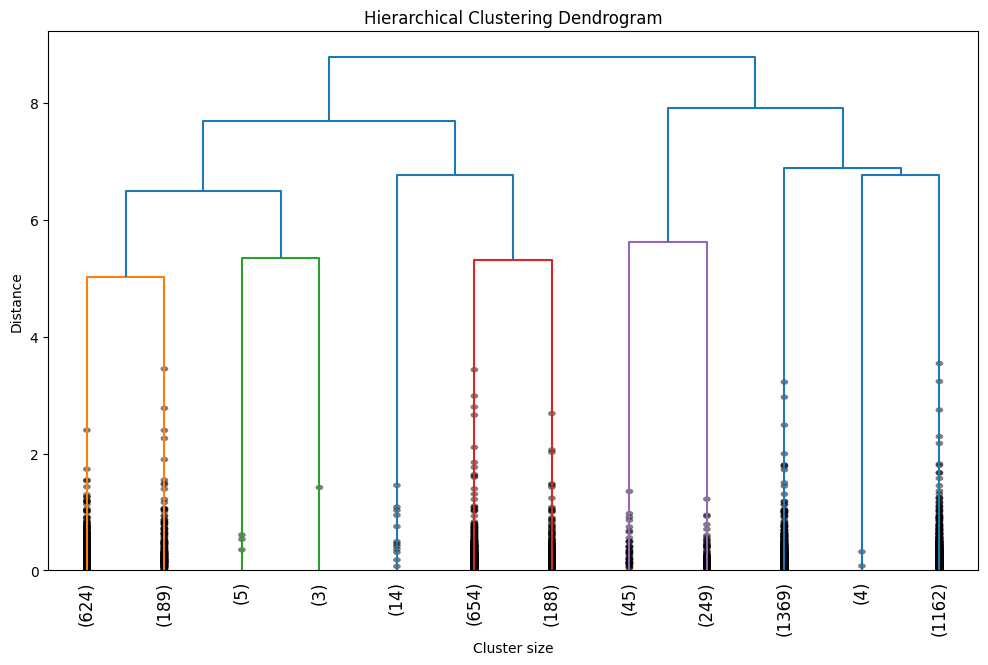

In [404]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your dataset after dimensionality reduction
# Generate the linkage matrix using Ward's method
Z = linkage(pca_result3N, 'average')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# This line draws a threshold line to help identify the number of clusters
plt.axhline(y=25, color='r', linestyle='--')  # Adjust 'y' based on your dendrogram

plt.show()


### Model


### Second Approach -Nir 

In [186]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np



def custom_normalize_row(row):
    max_abs_value = np.max(np.abs(row))
    if max_abs_value == 0:
        return row
    else:
        return row / max_abs_value

# Apply the custom row-wise normalization to each DataFrame
monetary_df_scaled_row = numric_df.apply(custom_normalize_row, axis=1)
ratios_df_scaled_row = Ratio_df.apply(custom_normalize_row, axis=1)
if isinstance(df_categorical_encoded, np.ndarray):
    # Assuming you want to name the columns based on the encoding process
    # This step might need adjustment based on how df_categorical_encoded was created
    df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=[f'Cat_{i}' for i in range(df_categorical_encoded.shape[1])])

df_scaled_combined = pd.concat([monetary_df_scaled_row, ratios_df_scaled_row, df_categorical_encoded], axis=1)
# Convert df_categorical_encoded to a DataFrame if it's a NumPy array




In [187]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # n_components can be 2 or 3 for visualization
tsne_results = tsne.fit_transform(df_scaled_combined)

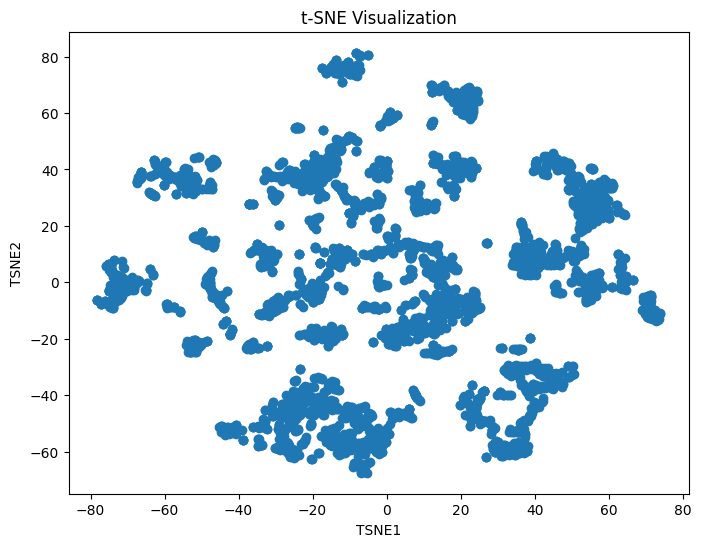

In [188]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show() 


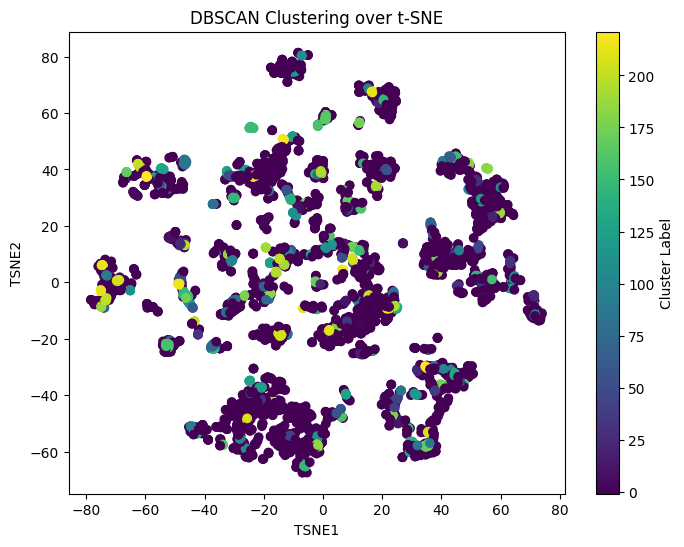

In [189]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_tsne)


df_tsne['Cluster'] = clusters


plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Cluster'])
plt.title('DBSCAN Clustering over t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster Label')
plt.show() 



C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


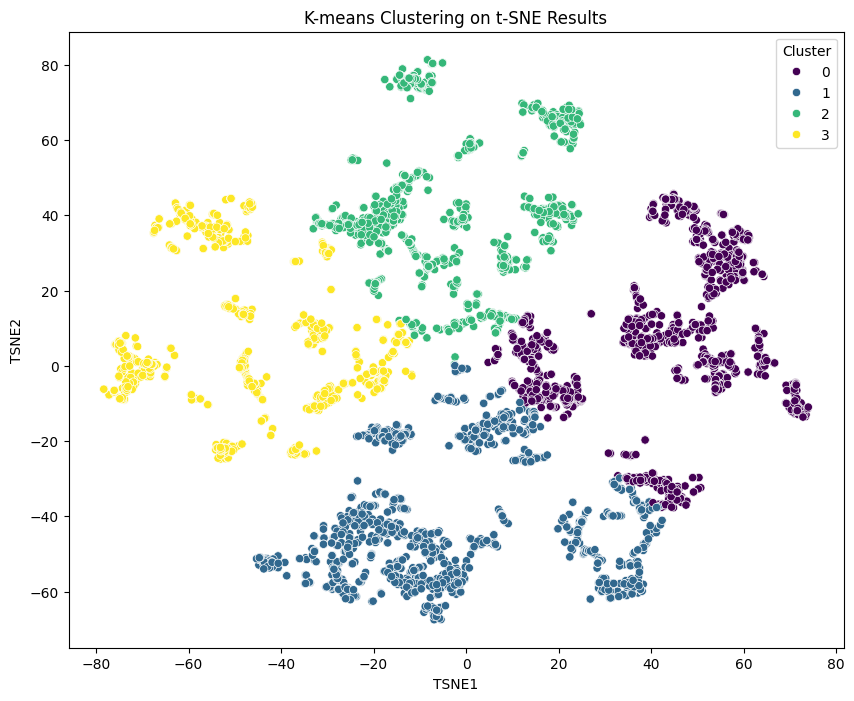

In [190]:
from sklearn.cluster import KMeans


k = 4  # Example number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)
df_tsne['Cluster'] = kmeans.fit_predict(df_tsne[['TSNE1', 'TSNE2']])
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('K-means Clustering on t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [191]:
silhouette_avg = silhouette_score(df_scaled_combined, df_tsne['Cluster'])

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 4 clusters: 0.087


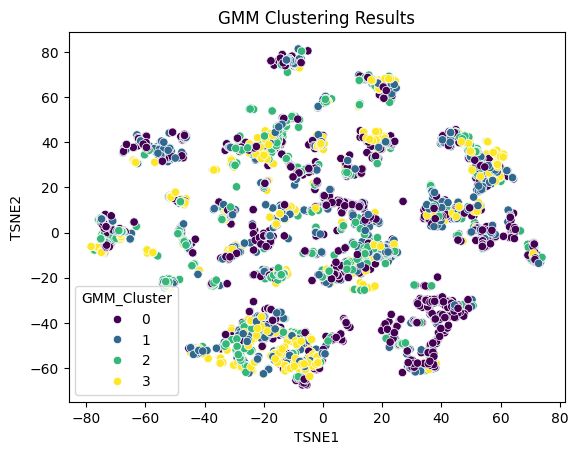

In [192]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import seaborn as sns

# Assuming df_tsne already contains TSNE1 and TSNE2 columns
# Add the GMM labels to df_tsne for plotting
df_tsne['GMM_Cluster'] = gmm_labels

# Plotting with the correct labels
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('GMM Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


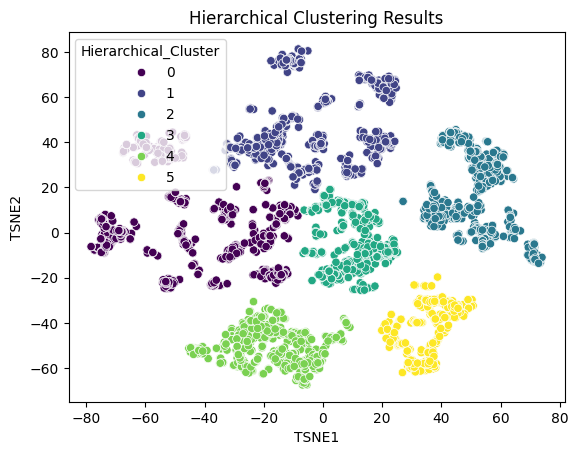

In [193]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is your dataset and df_tsne is the DataFrame with TSNE1 and TSNE2 columns

# Instantiate and fit the model
hierarchical = AgglomerativeClustering(n_clusters=6, linkage='ward')
# Perform hierarchical clustering on the t-SNE reduced dimensions
hierarchical_labels = hierarchical.fit_predict(df_tsne[['TSNE1', 'TSNE2']])

# Add the hierarchical clustering labels to df_tsne for plotting
df_tsne['Hierarchical_Cluster'] = hierarchical_labels

# Plotting the hierarchical clustering results
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Hierarchical_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('Hierarchical Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()
